# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

import time
import json
#import openweathermapy as ow

from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



In [ ]:
## Generate Cities List

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
#lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lats = np.random.uniform(low=-90.000, high=90.000, size=200)
lngs = np.random.uniform(low=-180.000, high=180.000, size=200)


lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


In [2]:
#List for holding lat_lngs and cities
lat_lngs = [] 
cities = []

#Create a set of random lat and lng combinations
#lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

#lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lats = np.random.uniform(low=-90.000, high=90.000, size=1500) 
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

#Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs: 
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
# If the city is unique, then add it to a our cities list

        cities.append(city)
    
#Print the city count to confirm sufficient count
len(cities)

583

In [23]:
cities


['thompson',
 'oskarshamn',
 'puerto escondido',
 'karabash',
 'lima',
 'kapaa',
 'illoqqortoormiut',
 'rikitea',
 'bredasdorp',
 'longyearbyen',
 'porbandar',
 'tuktoyaktuk',
 'batsfjord',
 'ushuaia',
 'mataura',
 'barentsburg',
 'busselton',
 'brewster',
 'ituni',
 'barrow',
 'ballina',
 'nurlat',
 'bronnoysund',
 'new norfolk',
 'hay river',
 'disna',
 'bluff',
 'tasiilaq',
 'port alfred',
 'jamestown',
 'rio grande',
 'ojinaga',
 'albany',
 'gardan diwal',
 'luwuk',
 'vaini',
 'tazovskiy',
 'salinopolis',
 'mackay',
 'torbay',
 'narsaq',
 'armidale',
 'fujin',
 'taolanaro',
 'san vicente',
 'puerto ayora',
 'pombia',
 'san patricio',
 'hamada',
 'arraial do cabo',
 'vestmanna',
 'hobart',
 'nishihara',
 'santa lucia',
 'mar del plata',
 'cabo san lucas',
 'chuy',
 'beringovskiy',
 'khatanga',
 'butaritari',
 'kahului',
 'saint george',
 'vardo',
 'laguna',
 'guerrero negro',
 'paamiut',
 'bethel',
 'iqaluit',
 'hirara',
 'cherskiy',
 'tumannyy',
 'juybar',
 'ahipara',
 'atuona',
 '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
units = "imperial"

url = "http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q="



city = "albany"

#city = input("City Name: ")

query_url = url + city

print (query_url)

json_data = requests.get(query_url).json()

pprint(json_data)

cloud = json_data ["clouds"]["all"]
print (cloud)
lat = json_data ["coord"]["lat"]
print (lat)

http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=albany
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 42.65, 'lon': -73.75},
 'dt': 1554774265,
 'id': 5106834,
 'main': {'humidity': 87,
          'pressure': 1007,
          'temp': 282.35,
          'temp_max': 284.82,
          'temp_min': 279.15},
 'name': 'Albany',
 'sys': {'country': 'US',
         'id': 3273,
         'message': 0.0063,
         'sunrise': 1554719128,
         'sunset': 1554766075,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 302.505, 'speed': 2.14}}
90
42.65


In [4]:
lat_list = []
lng_list = []
Temp_list = []
Humidity_list =[]
City_list = []
Cloud_list= []
Wind_list = []
Date_list = []
Country_list = []

for city in cities:
    print ("Accessing data request" + " " + city) 
    try:
        query_url = url + city
        print (query_url)
        json_data = requests.get(query_url).json()
        pprint (json_data)
        lat = json_data ["coord"]["lat"]
        lat_list.append (lat)
        print (lat_list)
        lon = json_data ["coord"]["lon"]
        lng_list.append (lon)
        print (lng_list)
        Temp_list.append(json_data ["main"]["temp_max"])
        print (Temp_list)
        Humidity_list.append(json_data["main"]["humidity"])
        print (Humidity_list)
        City_list.append(json_data["name"])
        print (City_list)
        Cloud_list.append(json_data ["clouds"]["all"])
        print (Cloud_list)
        Wind_list.append(json_data ["wind"]["speed"])
        Country_list.append (json_data ["sys"]["country"])
        Date_list.append(json_data ["dt"])
        
    
    except:
        print("Skip City" + city)
        
        
print (lat_list)
print (lng_list)
print (Temp_list) 
print(Humidity_list)
print (City_list)
print (Cloud_list)
print (Wind_list)
        
#pprint (json_data)        
    
    
    

Accessing data request havoysund
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=havoysund
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 71, 'lon': 24.66},
 'dt': 1554771000,
 'id': 779622,
 'main': {'humidity': 85,
          'pressure': 1031,
          'temp': 266.15,
          'temp_max': 266.15,
          'temp_min': 266.15},
 'name': 'Havoysund',
 'sys': {'country': 'NO',
         'id': 1632,
         'message': 0.0046,
         'sunrise': 1554777742,
         'sunset': 1554832999,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 110, 'speed': 2.6}}
[71]
[24.66]
[266.15]
[85]
['Havoysund']
[0]
Accessing data request viransehir
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=viransehir
{'base': 'stations'

{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': -21.21, 'lon': -159.78},
 'dt': 1554771600,
 'id': 4035715,
 'main': {'humidity': 78,
          'pressure': 1015,
          'temp': 300.15,
          'temp_max': 300.15,
          'temp_min': 300.15},
 'name': 'Avarua',
 'sys': {'country': 'CK',
         'id': 7271,
         'message': 0.0041,
         'sunrise': 1554742109,
         'sunset': 1554784379,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 80, 'speed': 6.2}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21]
[24.66, 39.76, -60.23, 168.86, 68.9, 15.16, -68.31, -134.97, -56.15, -73.75, -159.78]
[266.15, 283.779, 292.428, 296.48, 274.379, 285.978, 279.15, 297.879, 267.978, 284.82, 300.15]
[85, 97, 51, 56, 90, 89, 60, 100, 94, 87, 78]
['Havoysund', 'Viransehir', 'Barrow', 'Mat

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': -34.42, 'lon': 19.24},
 'dt': 1554773481,
 'id': 3366880,
 'main': {'humidity': 92,
          'pressure': 1012,
          'temp': 291.67,
          'temp_max': 292.59,
          'temp_min': 290.93},
 'name': 'Hermanus',
 'rain': {'3h': 0.45},
 'sys': {'country': 'ZA',
         'id': 2006131,
         'message': 0.0047,
         'sunrise': 1554786061,
         'sunset': 1554827281,
         'type': 3},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 106.505, 'speed': 1.52}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42]
[24.66, 39.76, -60.23, 168.86, 68.9, 15.16, -68.31, -134.97, -56.15, -73.75, -159.78, 146.36, -2.56, -53.46, 18.42, 140.83, -159.32, 19.24]
[266.15, 283.779, 292.428, 296.48, 274.379, 285.978, 279.15, 297.879, 267.

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 10.24, 'lon': -61.45},
 'dt': 1554774398,
 'id': 3573739,
 'main': {'humidity': 78,
          'pressure': 1015,
          'temp': 297.61,
          'temp_max': 298.15,
          'temp_min': 296.48},
 'name': 'Esperance',
 'sys': {'country': 'TT',
         'id': 8810,
         'message': 0.0037,
         'sunrise': 1554717533,
         'sunset': 1554761766,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 130, 'speed': 1.5}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24]
[24.66, 39.76, -60.23, 168.86, 68.9, 15.16, -68.31, -134.97, -56.15, -73.75, -159.78, 146.36, -2.56, -53.46, 18.42, 140.83, -159.32, 19.24, 99.94, -151.02, -77.61, 74.49, -151.26,

{'cod': '404', 'message': 'city not found'}
Skip Cityaakirkeby
Accessing data request rybnaya sloboda
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=rybnaya sloboda
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 55.46, 'lon': 50.14},
 'dt': 1554769800,
 'id': 499987,
 'main': {'humidity': 80,
          'pressure': 1021,
          'temp': 272.15,
          'temp_max': 272.15,
          'temp_min': 272.15},
 'name': 'Rybnaya Sloboda',
 'sys': {'country': 'RU',
         'id': 9038,
         'message': 0.0032,
         'sunrise': 1554774677,
         'sunset': 1554823836,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 80, 'speed': 2}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42,

{'cod': '404', 'message': 'city not found'}
Skip Citypilao arcado
Accessing data request bethel
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=bethel
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 60.79, 'lon': -161.76},
 'dt': 1554771360,
 'id': 5880568,
 'main': {'humidity': 86,
          'pressure': 994,
          'temp': 276.65,
          'temp_max': 277.15,
          'temp_min': 276.15},
 'name': 'Bethel',
 'sys': {'country': 'US',
         'id': 7640,
         'message': 0.0043,
         'sunrise': 1554738531,
         'sunset': 1554788908,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 210, 'speed': 5.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 12.49, 'lon': -16.54},
 'dt': 1554774197,
 'id': 2246901,
 'main': {'grnd_level': 1009.12,
          'humidity': 73,
          'pressure': 1009.67,
          'sea_level': 1009.67,
          'temp': 295.978,
          'temp_max': 295.978,
          'temp_min': 295.978},
 'name': 'Oussouye',
 'sys': {'country': 'SN',
         'message': 0.0031,
         'sunrise': 1554793050,
         'sunset': 1554837463},
 'weather': [{'description': 'clear sky',
              'icon': '02n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 343.005, 'speed': 4.67}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49]
[24.66, 39.76, -60.23, 168.86, 68.9, 15.16, -68.31, -134.97, -56.15, -73.75, -1

{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 73.51, 'lon': 80.55},
 'dt': 1554774426,
 'id': 1507390,
 'main': {'grnd_level': 1007.52,
          'humidity': 100,
          'pressure': 1007.95,
          'sea_level': 1007.95,
          'temp': 263.978,
          'temp_max': 263.978,
          'temp_min': 263.978},
 'name': 'Dikson',
 'sys': {'country': 'RU',
         'message': 0.0052,
         'sunrise': 1554763325,
         'sunset': 1554820594},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 317.005, 'speed': 3.74}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51]
[24.66, 39.76, -60.23, 168.86, 68.9, 15.16, -68

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 33.72, 'lon': 135.99},
 'dt': 1554771600,
 'id': 1847947,
 'main': {'humidity': 35,
          'pressure': 1019,
          'temp': 287.15,
          'temp_max': 287.15,
          'temp_min': 287.15},
 'name': 'Shingu',
 'sys': {'country': 'JP',
         'id': 7959,
         'message': 0.0058,
         'sunrise': 1554755632,
         'sunset': 1554801681,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 310, 'speed': 4.6}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72]
[24.66, 39.76, -60.23, 168.86

{'cod': '404', 'message': 'city not found'}
Skip Cityilloqqortoormiut
Accessing data request rabak
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=rabak
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 13.18, 'lon': 32.74},
 'dt': 1554774428,
 'id': 368277,
 'main': {'grnd_level': 958,
          'humidity': 53,
          'pressure': 1003.59,
          'sea_level': 1003.59,
          'temp': 293.678,
          'temp_max': 293.678,
          'temp_min': 293.678},
 'name': 'Rabak',
 'sys': {'country': 'SD',
         'message': 0.0035,
         'sunrise': 1554781205,
         'sunset': 1554825659},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 158.005, 'speed': 1.27}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 63.43, 'lon': 53.58},
 'dt': 1554774429,
 'id': 468991,
 'main': {'grnd_level': 1000.8,
          'humidity': 94,
          'pressure': 1020.07,
          'sea_level': 1020.07,
          'temp': 272.029,
          'temp_max': 272.029,
          'temp_min': 272.029},
 'name': 'Yarega',
 'sys': {'country': 'RU',
         'message': 0.0036,
         'sunrise': 1554772743,
         'sunset': 1554824120},
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 116.505, 'speed': 2.24}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 38.14, 'lon': -7.45},
 'dt': 1554771600,
 'id': 2265686,
 'main': {'humidity': 93,
          'pressure': 1018,
          'temp': 283.15,
          'temp_max': 283.15,
          'temp_min': 283.15},
 'name': 'Moura',
 'sys': {'country': 'PT',
         'id': 6884,
         'message': 0.0039,
         'sunrise': 1554789798,
         'sunset': 1554836353,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 230, 'speed': 3.6}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.1

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 55.74, 'lon': -97.86},
 'dt': 1554771600,
 'id': 6165406,
 'main': {'humidity': 52,
          'pressure': 1022,
          'temp': 266.15,
          'temp_max': 266.15,
          'temp_min': 266.15},
 'name': 'Thompson',
 'sys': {'country': 'CA',
         'id': 935,
         'message': 0.0035,
         'sunrise': 1554723857,
         'sunset': 1554772916,
         'type': 1},
 'visibility': 24140,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 60, 'speed': 3.6}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -0.74, 'lon': -90.35},
 'dt': 1554774359,
 'id': 3652764,
 'main': {'humidity': 92,
          'pressure': 1011,
          'temp': 299.82,
          'temp_max': 299.82,
          'temp_min': 299.82},
 'name': 'Puerto Ayora',
 'rain': {},
 'sys': {'country': 'EC',
         'id': 2005652,
         'message': 0.0049,
         'sunrise': 1554724806,
         'sunset': 1554768363,
         'type': 3},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 176.005, 'speed': 3.42}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28,

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -13.71, 'lon': -76.2},
 'dt': 1554771600,
 'id': 3932145,
 'main': {'humidity': 78,
          'pressure': 1012,
          'temp': 295.15,
          'temp_max': 295.15,
          'temp_min': 295.15},
 'name': 'Pisco',
 'sys': {'country': 'PE',
         'id': 8691,
         'message': 0.0037,
         'sunrise': 1554721805,
         'sunset': 1554764573,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 210, 'speed': 8.7}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18,

{'cod': '404', 'message': 'city not found'}
Skip Citymys shmidta
Accessing data request oksbol
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=oksbol
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 55.63, 'lon': 8.29},
 'dt': 1554774200,
 'id': 2615859,
 'main': {'humidity': 96,
          'pressure': 1019,
          'temp': 273.25,
          'temp_max': 274.15,
          'temp_min': 272.59},
 'name': 'Oksbol',
 'sys': {'country': 'DK',
         'id': 1574,
         'message': 0.0037,
         'sunrise': 1554784685,
         'sunset': 1554833913,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 20, 'speed': 2.6}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 51.04, 'lon': -4.21},
 'dt': 1554774426,
 'id': 2641434,
 'main': {'humidity': 93,
          'pressure': 1011,
          'temp': 280.14,
          'temp_max': 282.04,
          'temp_min': 278.71},
 'name': 'Northam',
 'sys': {'country': 'GB',
         'id': 1472,
         'message': 0.0043,
         'sunrise': 1554788132,
         'sunset': 1554836464,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 40, 'speed': 2.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18,

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 27.97, 'lon': -114.04},
 'dt': 1554774435,
 'id': 4021858,
 'main': {'grnd_level': 1003.04,
          'humidity': 49,
          'pressure': 1014.19,
          'sea_level': 1014.19,
          'temp': 295.029,
          'temp_max': 295.029,
          'temp_min': 295.029},
 'name': 'Guerrero Negro',
 'sys': {'country': 'MX',
         'message': 0.0076,
         'sunrise': 1554729515,
         'sunset': 1554775022},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 315.005, 'speed': 4.94}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 1

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -9.67, 'lon': -35.74},
 'dt': 1554771600,
 'id': 3395981,
 'main': {'humidity': 88,
          'pressure': 1014,
          'temp': 297.15,
          'temp_max': 297.15,
          'temp_min': 297.15},
 'name': 'Maceio',
 'sys': {'country': 'BR',
         'id': 8413,
         'message': 0.0035,
         'sunrise': 1554711970,
         'sunset': 1554754991,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 350, 'speed': 2.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -42.48, 'lon': -73.76},
 'dt': 1554771600,
 'id': 3896218,
 'main': {'humidity': 100,
          'pressure': 1014,
          'temp': 284.15,
          'temp_max': 284.15,
          'temp_min': 284.15},
 'name': 'Castro',
 'sys': {'country': 'CL',
         'id': 8512,
         'message': 0.0038,
         'sunrise': 1554722318,
         'sunset': 1554762889,
         'type': 1},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 350, 'speed': 7.7}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63.43, 59.1, -16.

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 8.96, 'lon': 38.73},
 'dt': 1554774436,
 'id': 344979,
 'main': {'grnd_level': 766.88,
          'humidity': 89,
          'pressure': 1009.87,
          'sea_level': 1009.87,
          'temp': 284.178,
          'temp_max': 284.178,
          'temp_min': 284.178},
 'name': 'Lebu',
 'sys': {'country': 'ET',
         'message': 0.0037,
         'sunrise': 1554779908,
         'sunset': 1554824081},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 312.505, 'speed': 1.92}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 35.76, 'lon': 139.74},
 'dt': 1554774304,
 'id': 1850144,
 'main': {'humidity': 34,
          'pressure': 1016,
          'temp': 286.57,
          'temp_max': 288.71,
          'temp_min': 284.15},
 'name': 'Kita',
 'sys': {'country': 'JP',
         'id': 8077,
         'message': 0.0053,
         'sunrise': 1554754633,
         'sunset': 1554800881,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 300, 'gust': 15.4, 'speed': 7.7}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 9.49, 'lon': 50.81},
 'dt': 1554774437,
 'id': 64814,
 'main': {'grnd_level': 1005.68,
          'humidity': 100,
          'pressure': 1010.63,
          'sea_level': 1010.63,
          'temp': 299.228,
          'temp_max': 299.228,
          'temp_min': 299.228},
 'name': 'Bandarbeyla',
 'sys': {'country': 'SO',
         'message': 0.0034,
         'sunrise': 1554776993,
         'sunset': 1554821199},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 173.505, 'speed': 2.97}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -17.53, 'lon': -149.33},
 'dt': 1554774144,
 'id': 4033356,
 'main': {'humidity': 58,
          'pressure': 1011,
          'temp': 304.5,
          'temp_max': 304.82,
          'temp_min': 304.15},
 'name': 'Tiarei',
 'sys': {'country': 'PF',
         'id': 7318,
         'message': 0.0029,
         'sunrise': 1554739479,
         'sunset': 1554781995,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 30, 'speed': 3.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 9.44, 'lon': -78.59},
 'dt': 1554774317,
 'id': 3703946,
 'main': {'grnd_level': 1007.92,
          'humidity': 99,
          'pressure': 1011.75,
          'sea_level': 1011.75,
          'temp': 300.379,
          'temp_max': 300.379,
          'temp_min': 300.379},
 'name': 'Nargana',
 'sys': {'country': 'PA',
         'message': 0.0031,
         'sunrise': 1554721671,
         'sunset': 1554765854},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 11.0049, 'speed': 3.52}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.4

{'cod': '404', 'message': 'city not found'}
Skip Cityamderma
Accessing data request bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=bathsheba
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 13.22, 'lon': -59.52},
 'dt': 1554771600,
 'id': 3374083,
 'main': {'humidity': 73,
          'pressure': 1016,
          'temp': 298.15,
          'temp_max': 298.15,
          'temp_min': 298.15},
 'name': 'Bathsheba',
 'sys': {'country': 'BB',
         'id': 8772,
         'message': 0.0033,
         'sunrise': 1554716974,
         'sunset': 1554761399,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 80, 'speed': 6.7}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, 

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 65.61, 'lon': -37.64},
 'dt': 1554771000,
 'id': 3424607,
 'main': {'humidity': 55,
          'pressure': 1029,
          'temp': 274.15,
          'temp_max': 274.15,
          'temp_min': 274.15},
 'name': 'Tasiilaq',
 'sys': {'country': 'GL',
         'id': 81,
         'message': 0.0057,
         'sunrise': 1554707980,
         'sunset': 1554759893,
         'type': 1},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 70, 'speed': 9.8}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63.43, 59.1, -16.48,

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 38.52, 'lon': -28.7},
 'dt': 1554771600,
 'id': 3372707,
 'main': {'humidity': 72,
          'pressure': 1021,
          'temp': 288.15,
          'temp_max': 288.15,
          'temp_min': 288.15},
 'name': 'Ribeira Grande',
 'sys': {'country': 'PT',
         'id': 6883,
         'message': 0.0045,
         'sunrise': 1554794872,
         'sunset': 1554841477,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 210, 'speed': 6.7}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 

{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': 63.46, 'lon': 48.9},
 'dt': 1554774440,
 'id': 544084,
 'main': {'grnd_level': 998.24,
          'humidity': 90,
          'pressure': 1018.19,
          'sea_level': 1018.19,
          'temp': 272.178,
          'temp_max': 272.178,
          'temp_min': 272.178},
 'name': 'Koslan',
 'sys': {'country': 'RU',
         'message': 0.0043,
         'sunrise': 1554773858,
         'sunset': 1554825250},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 210.005, 'speed': 1.22}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18

{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': 35.54, 'lon': 106.68},
 'dt': 1554774441,
 'id': 1798760,
 'main': {'grnd_level': 847.04,
          'humidity': 67,
          'pressure': 1015.55,
          'sea_level': 1015.55,
          'temp': 283.529,
          'temp_max': 283.529,
          'temp_min': 283.529},
 'name': 'Pingliang',
 'sys': {'country': 'CN',
         'message': 0.0039,
         'sunrise': 1554762570,
         'sunset': 1554808809},
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 357.005, 'speed': 3.52}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18

{'cod': '404', 'message': 'city not found'}
Skip Citydzhusaly
Accessing data request ouagadougou
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=ouagadougou
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 12.37, 'lon': -1.53},
 'dt': 1554771600,
 'id': 2357048,
 'main': {'humidity': 23,
          'pressure': 1010,
          'temp': 304.15,
          'temp_max': 304.15,
          'temp_min': 304.15},
 'name': 'Ouagadougou',
 'sys': {'country': 'BF',
         'id': 1122,
         'message': 0.0074,
         'sunrise': 1554789453,
         'sunset': 1554833857,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 340, 'speed': 2.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -1

{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': -0.9, 'lon': -89.6},
 'dt': 1554774442,
 'id': 3652758,
 'main': {'grnd_level': 1011.44,
          'humidity': 100,
          'pressure': 1011.91,
          'sea_level': 1011.91,
          'temp': 300.379,
          'temp_max': 300.379,
          'temp_min': 300.379},
 'name': 'Puerto Baquerizo Moreno',
 'sys': {'country': 'EC',
         'message': 0.0052,
         'sunrise': 1554724631,
         'sunset': 1554768178},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 166.005, 'speed': 1.82}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -42.78, 'lon': 147.06},
 'dt': 1554774434,
 'id': 2155415,
 'main': {'humidity': 75,
          'pressure': 1011,
          'temp': 285.86,
          'temp_max': 286.48,
          'temp_min': 284.82},
 'name': 'New Norfolk',
 'sys': {'country': 'AU',
         'id': 9545,
         'message': 0.0035,
         'sunrise': 1554755763,
         'sunset': 1554796237,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 290, 'speed': 6.7}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 26.25, 'lon': 105.93},
 'dt': 1554774442,
 'id': 1817968,
 'main': {'grnd_level': 864.16,
          'humidity': 50,
          'pressure': 1006.07,
          'sea_level': 1006.07,
          'temp': 297.279,
          'temp_max': 297.279,
          'temp_min': 297.279},
 'name': 'Anshun',
 'sys': {'country': 'CN',
         'message': 0.0033,
         'sunrise': 1554763168,
         'sunset': 1554808571},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 323.505, 'speed': 4.74}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 35.3, 'lon': 37.18},
 'dt': 1554774443,
 'id': 172515,
 'main': {'grnd_level': 965.52,
          'humidity': 94,
          'pressure': 1010.35,
          'sea_level': 1010.35,
          'temp': 284.279,
          'temp_max': 284.279,
          'temp_min': 284.279},
 'name': 'Abu Samrah',
 'sys': {'country': 'SY',
         'message': 0.0035,
         'sunrise': 1554779247,
         'sunset': 1554825486},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 79.0049, 'speed': 1.07}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 37.46, 'lon': -122.43},
 'dt': 1554774437,
 'id': 5354943,
 'main': {'humidity': 82,
          'pressure': 1022,
          'temp': 289.43,
          'temp_max': 292.59,
          'temp_min': 286.48},
 'name': 'Half Moon Bay',
 'rain': {'1h': 0.51},
 'sys': {'country': 'US',
         'id': 5154,
         'message': 0.0101,
         'sunrise': 1554731090,
         'sunset': 1554777475,
         'type': 1},
 'visibility': 12874,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 260, 'speed': 5.7}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 35.54, 'lon': -100.96},
 'dt': 1554774358,
 'id': 5527953,
 'main': {'humidity': 40,
          'pressure': 1016,
          'temp': 295.68,
          'temp_max': 299.15,
          'temp_min': 293.15},
 'name': 'Pampa',
 'sys': {'country': 'US',
         'id': 5389,
         'message': 0.0041,
         'sunrise': 1554726039,
         'sunset': 1554772222,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 210, 'speed': 3.6}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 49.16, 'lon': -123.14},
 'dt': 1554774427,
 'id': 6122085,
 'main': {'humidity': 93,
          'pressure': 1014,
          'temp': 281.71,
          'temp_max': 283.15,
          'temp_min': 280.37},
 'name': 'Richmond',
 'rain': {'1h': 0.96},
 'sys': {'country': 'CA',
         'id': 5232,
         'message': 0.0064,
         'sunrise': 1554730517,
         'sunset': 1554778388,
         'type': 1},
 'visibility': 4828,
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'},
             {'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 187.505, 'speed': 0.22}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 4

{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': 30.29, 'lon': 109.48},
 'dt': 1554774446,
 'id': 1811720,
 'main': {'grnd_level': 897.68,
          'humidity': 62,
          'pressure': 1004.55,
          'sea_level': 1004.55,
          'temp': 297.379,
          'temp_max': 297.379,
          'temp_min': 297.379},
 'name': 'Enshi',
 'sys': {'country': 'CN',
         'message': 0.0034,
         'sunrise': 1554762146,
         'sunset': 1554807890},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 52.5049, 'speed': 1.59}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -3.71, 'lon': -38.6},
 'dt': 1554773893,
 'id': 6320062,
 'main': {'humidity': 83,
          'pressure': 1013,
          'temp': 300.44,
          'temp_max': 301.15,
          'temp_min': 299.82},
 'name': 'Vila Velha',
 'sys': {'country': 'BR',
         'id': 8363,
         'message': 0.0042,
         'sunrise': 1554712477,
         'sunset': 1554755856,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 130, 'speed': 2.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 24.87, 'lon': -103.7},
 'dt': 1554774447,
 'id': 4012344,
 'main': {'grnd_level': 808.16,
          'humidity': 18,
          'pressure': 1014.95,
          'sea_level': 1014.95,
          'temp': 285.928,
          'temp_max': 285.928,
          'temp_min': 285.928},
 'name': 'Cuencame',
 'sys': {'country': 'MX',
         'message': 0.0038,
         'sunrise': 1554727159,
         'sunset': 1554772416},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 26.5049, 'speed': 3.14}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 18.22, 'lon': 42.5},
 'dt': 1554771600,
 'id': 110690,
 'main': {'humidity': 59,
          'pressure': 1021,
          'temp': 289.15,
          'temp_max': 289.15,
          'temp_min': 289.15},
 'name': 'Abha',
 'sys': {'country': 'SA',
         'id': 7396,
         'message': 0.0038,
         'sunrise': 1554778688,
         'sunset': 1554823492,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 160, 'speed': 3.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63.

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -9.65, 'lon': 120.26},
 'dt': 1554774448,
 'id': 1622318,
 'main': {'grnd_level': 974.88,
          'humidity': 78,
          'pressure': 1009.75,
          'sea_level': 1009.75,
          'temp': 302.978,
          'temp_max': 302.978,
          'temp_min': 302.978},
 'name': 'Waingapu',
 'sys': {'country': 'ID',
         'message': 0.003,
         'sunrise': 1554760929,
         'sunset': 1554803933},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 345.505, 'speed': 2.14}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.4

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 18.46, 'lon': -69.3},
 'dt': 1554774207,
 'id': 3493032,
 'main': {'humidity': 74,
          'pressure': 1017,
          'temp': 297.95,
          'temp_max': 299.15,
          'temp_min': 297.15},
 'name': 'San Pedro de Macoris',
 'sys': {'country': 'DO',
         'id': 7077,
         'message': 0.0044,
         'sunrise': 1554719144,
         'sunset': 1554763923,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 120, 'speed': 3.6}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 69.19, 'lon': 33.23},
 'dt': 1554771600,
 'id': 795243,
 'main': {'humidity': 85,
          'pressure': 1027,
          'temp': 268.15,
          'temp_max': 268.15,
          'temp_min': 268.15},
 'name': 'Snezhnogorsk',
 'sys': {'country': 'RU',
         'id': 8927,
         'message': 0.0036,
         'sunrise': 1554776285,
         'sunset': 1554830343,
         'type': 1},
 'visibility': 6000,
 'weather': [{'description': 'light shower snow',
              'icon': '13n',
              'id': 620,
              'main': 'Snow'}],
 'wind': {'deg': 310, 'speed': 1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 39.86, 'lon': 116.51},
 'dt': 1554774438,
 'id': 1816670,
 'main': {'humidity': 93,
          'pressure': 1024,
          'temp': 279.01,
          'temp_max': 282.59,
          'temp_min': 277.59},
 'name': 'Taozhuang',
 'sys': {'country': 'CN',
         'id': 9609,
         'message': 0.0041,
         'sunrise': 1554759983,
         'sunset': 1554806679,
         'type': 1},
 'visibility': 6000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 10, 'speed': 3}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 13.64, 'lon': -88.78},
 'dt': 1554771000,
 'id': 3583178,
 'main': {'humidity': 78,
          'pressure': 1011,
          'temp': 299.65,
          'temp_max': 301.15,
          'temp_min': 298.15},
 'name': 'San Vicente',
 'sys': {'country': 'SV',
         'id': 7222,
         'message': 0.0032,
         'sunrise': 1554723980,
         'sunset': 1554768436,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'haze', 'icon': '50n', 'id': 721, 'main': 'Haze'}],
 'wind': {'deg': 240, 'speed': 3.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63.43, 59.1, -16.48, 38.14, 45.18, -37.8

{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': 63.92, 'lon': 127.47},
 'dt': 1554774451,
 'id': 2017215,
 'main': {'grnd_level': 981.68,
          'humidity': 72,
          'pressure': 1009.75,
          'sea_level': 1009.75,
          'temp': 272.578,
          'temp_max': 272.578,
          'temp_min': 272.578},
 'name': 'Sangar',
 'sys': {'country': 'RU',
         'message': 0.0038,
         'sunrise': 1554754963,
         'sunset': 1554806439},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 250.005, 'speed': 2.19}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -30.17, 'lon': -50.22},
 'dt': 1554774451,
 'id': 3466165,
 'main': {'grnd_level': 1009.52,
          'humidity': 90,
          'pressure': 1019.55,
          'sea_level': 1019.55,
          'temp': 288.828,
          'temp_max': 288.828,
          'temp_min': 288.828},
 'name': 'Cidreira',
 'sys': {'country': 'BR',
         'message': 0.0034,
         'sunrise': 1554716126,
         'sunset': 1554757784},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 123.505, 'speed': 2.19}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 46.25, 'lon': 32.3},
 'dt': 1554771600,
 'id': 712682,
 'main': {'humidity': 76,
          'pressure': 1007,
          'temp': 282.15,
          'temp_max': 282.15,
          'temp_min': 282.15},
 'name': 'Bekhtery',
 'sys': {'country': 'UA',
         'id': 8913,
         'message': 0.0035,
         'sunrise': 1554779762,
         'sunset': 1554827312,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 50, 'speed': 4}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 32.3, 'lon': -64.78},
 'dt': 1554773460,
 'id': 3573197,
 'main': {'humidity': 82,
          'pressure': 1018,
          'temp': 292,
          'temp_max': 293.15,
          'temp_min': 290.93},
 'name': 'Hamilton',
 'sys': {'country': 'BM',
         'id': 8816,
         'message': 0.004,
         'sunrise': 1554717516,
         'sunset': 1554763381,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 260, 'speed': 3.6}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -19.55, 'lon': 169.27},
 'dt': 1554771600,
 'id': 2136825,
 'main': {'humidity': 66,
          'pressure': 1012,
          'temp': 302.15,
          'temp_max': 302.15,
          'temp_min': 302.15},
 'name': 'Isangel',
 'sys': {'country': 'VU',
         'id': 7317,
         'message': 0.0194,
         'sunrise': 1554749483,
         'sunset': 1554791859,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 180, 'speed': 2.6}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28,

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 65.01, 'lon': 53.91},
 'dt': 1554774454,
 'id': 554830,
 'main': {'grnd_level': 1009.04,
          'humidity': 86,
          'pressure': 1022.51,
          'sea_level': 1022.51,
          'temp': 268.978,
          'temp_max': 268.978,
          'temp_min': 268.978},
 'name': 'Izhma',
 'sys': {'country': 'RU',
         'message': 0.0039,
         'sunrise': 1554772362,
         'sunset': 1554824342},
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 63.0049, 'speed': 1.52}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18

{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': 55.95, 'lon': 67.67},
 'dt': 1554774454,
 'id': 1511382,
 'main': {'grnd_level': 1004.64,
          'humidity': 80,
          'pressure': 1021.15,
          'sea_level': 1021.15,
          'temp': 278.029,
          'temp_max': 278.029,
          'temp_min': 278.029},
 'name': 'Armizonskoye',
 'sys': {'country': 'RU',
         'message': 0.0035,
         'sunrise': 1554770423,
         'sunset': 1554819677},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 311.505, 'speed': 1.74}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 29.96, 'lon': 122.3},
 'dt': 1554774455,
 'id': 1795632,
 'main': {'grnd_level': 1006.64,
          'humidity': 90,
          'pressure': 1007.87,
          'sea_level': 1007.87,
          'temp': 291.279,
          'temp_max': 291.279,
          'temp_min': 291.279},
 'name': 'Shenjiamen',
 'sys': {'country': 'CN',
         'message': 0.0032,
         'sunrise': 1554759086,
         'sunset': 1554804797},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 181.505, 'speed': 10.59}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 43.38, 'lon': -3.22},
 'dt': 1554774384,
 'id': 3125621,
 'main': {'humidity': 93,
          'pressure': 1011,
          'temp': 280.87,
          'temp_max': 284.26,
          'temp_min': 277.04},
 'name': 'Castro-Urdiales',
 'sys': {'country': 'ES',
         'id': 6395,
         'message': 0.0046,
         'sunrise': 1554788472,
         'sunset': 1554835649,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'speed': 0.5}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 18.22, 'lon': -63.06},
 'dt': 1554774341,
 'id': 3573374,
 'main': {'humidity': 73,
          'pressure': 1019,
          'temp': 298.15,
          'temp_max': 298.15,
          'temp_min': 298.15},
 'name': 'The Valley',
 'sys': {'country': 'AI',
         'id': 8801,
         'message': 0.0054,
         'sunrise': 1554717655,
         'sunset': 1554762417,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 90, 'speed': 5.7}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 62.45, 'lon': -114.38},
 'dt': 1554774332,
 'id': 6185377,
 'main': {'humidity': 80,
          'pressure': 1010,
          'temp': 274.93,
          'temp_max': 275.15,
          'temp_min': 274.82},
 'name': 'Yellowknife',
 'sys': {'country': 'CA',
         'id': 1007,
         'message': 0.0039,
         'sunrise': 1554726929,
         'sunset': 1554777772,
         'type': 1},
 'visibility': 24140,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 120, 'speed': 4.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 17.88, 'lon': -76.41},
 'dt': 1554771600,
 'id': 3489440,
 'main': {'humidity': 61,
          'pressure': 1015,
          'temp': 300.15,
          'temp_max': 300.15,
          'temp_min': 300.15},
 'name': 'Morant Bay',
 'sys': {'country': 'JM',
         'id': 7105,
         'message': 0.0032,
         'sunrise': 1554720869,
         'sunset': 1554765610,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 120, 'speed': 5.7}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.2

{'cod': '404', 'message': 'city not found'}
Skip Cityattawapiskat
Accessing data request cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=cherskiy
{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': 68.75, 'lon': 161.3},
 'dt': 1554774458,
 'id': 2126199,
 'main': {'grnd_level': 1001.92,
          'humidity': 75,
          'pressure': 1010.07,
          'sea_level': 1010.07,
          'temp': 268.978,
          'temp_max': 268.978,
          'temp_min': 268.978},
 'name': 'Cherskiy',
 'sys': {'country': 'RU',
         'message': 0.0031,
         'sunrise': 1554745772,
         'sunset': 1554799394},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 326.005, 'speed': 0.77}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08,

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 63.75, 'lon': -68.52},
 'dt': 1554774123,
 'id': 5983720,
 'main': {'humidity': 78,
          'pressure': 1027,
          'temp': 259.98,
          'temp_max': 260.15,
          'temp_min': 259.82},
 'name': 'Iqaluit',
 'sys': {'country': 'CA',
         'id': 797,
         'message': 0.0053,
         'sunrise': 1554715728,
         'sunset': 1554766965,
         'type': 1},
 'visibility': 24140,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 340, 'speed': 9.8}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 5.88, 'lon': -10.05},
 'dt': 1554771600,
 'id': 2278158,
 'main': {'humidity': 94,
          'pressure': 1011,
          'temp': 299.15,
          'temp_max': 299.15,
          'temp_min': 299.15},
 'name': 'Buchanan',
 'sys': {'country': 'LR',
         'id': 2389,
         'message': 0.0031,
         'sunrise': 1554791711,
         'sunset': 1554835687,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 173.005, 'speed': 2.19}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5

          'pressure': 1022,
          'temp': 285.74,
          'temp_max': 286.15,
          'temp_min': 285.15},
 'name': 'Sakaiminato',
 'sys': {'country': 'JP',
         'id': 8028,
         'message': 0.0044,
         'sunrise': 1554756204,
         'sunset': 1554802434,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 70, 'speed': 3.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63.43, 59.1, -16.48, 38.14, 45.18, -37.83, 55.74, 39.45, 78.22, -0.74, 59.7, -33.21, 10.57, -13.71, 35.72, 22.93, 43.74, 55.63, 20.52, 31.8, 51.04, 41.

{'cod': '404', 'message': 'city not found'}
Skip Citybelushya guba
Accessing data request phuket
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=phuket
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 7.89, 'lon': 98.4},
 'dt': 1554771600,
 'id': 1151254,
 'main': {'humidity': 70,
          'pressure': 1011,
          'temp': 301.46,
          'temp_max': 303.15,
          'temp_min': 300.15},
 'name': 'Phuket',
 'sys': {'country': 'TH',
         'id': 9278,
         'message': 0.0034,
         'sunrise': 1554765627,
         'sunset': 1554809726,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'fog', 'icon': '50d', 'id': 741, 'main': 'Fog'}],
 'wind': {'deg': 229.005, 'speed': 0.44}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 3

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 37.38, 'lon': 55.49},
 'dt': 1554771600,
 'id': 129512,
 'main': {'humidity': 100,
          'pressure': 1011,
          'temp': 285.15,
          'temp_max': 285.15,
          'temp_min': 285.15},
 'name': 'Kalaleh',
 'sys': {'country': 'IR',
         'id': 7492,
         'message': 0.0048,
         'sunrise': 1554774749,
         'sunset': 1554821197,
         'type': 1},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 190, 'speed': 1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63.43, 59.1, -16.48, 3

{'cod': '404', 'message': 'city not found'}
Skip Cityrungata
Accessing data request kavkazskiy
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=kavkazskiy
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 45.73, 'lon': 39.01},
 'dt': 1554774165,
 'id': 482965,
 'main': {'grnd_level': 1004.8,
          'humidity': 84,
          'pressure': 1008.31,
          'sea_level': 1008.31,
          'temp': 284.129,
          'temp_max': 284.129,
          'temp_min': 284.129},
 'name': 'Kavkazskiy',
 'sys': {'country': 'RU',
         'message': 0.0033,
         'sunrise': 1554778191,
         'sunset': 1554825664},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 90.5049, 'speed': 5.29}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9

{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': 61.13, 'lon': 149.63},
 'dt': 1554774459,
 'id': 2120047,
 'main': {'grnd_level': 905.68,
          'humidity': 75,
          'pressure': 1007.63,
          'sea_level': 1007.63,
          'temp': 272.879,
          'temp_max': 272.879,
          'temp_min': 272.879},
 'name': 'Ust-Omchug',
 'sys': {'country': 'RU',
         'message': 0.0048,
         'sunrise': 1554750122,
         'sunset': 1554800645},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 262.005, 'speed': 1.57}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': -8.26, 'lon': -49.26},
 'dt': 1554774460,
 'id': 3401845,
 'main': {'grnd_level': 994,
          'humidity': 90,
          'pressure': 1012.59,
          'sea_level': 1012.59,
          'temp': 298.478,
          'temp_max': 298.478,
          'temp_min': 298.478},
 'name': 'Conceicao do Araguaia',
 'sys': {'country': 'BR',
         'message': 0.0049,
         'sunrise': 1554715172,
         'sunset': 1554758277},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 322.005, 'speed': 1.97}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.

{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': -46.43, 'lon': -67.52},
 'dt': 1554774220,
 'id': 3863379,
 'main': {'grnd_level': 985.76,
          'humidity': 75,
          'pressure': 1006.55,
          'sea_level': 1006.55,
          'temp': 287.728,
          'temp_max': 287.728,
          'temp_min': 287.728},
 'name': 'Mar del Plata',
 'sys': {'country': 'AR',
         'message': 0.003,
         'sunrise': 1554721036,
         'sunset': 1554761176},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 270.505, 'speed': 3.14}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77

{'cod': '404', 'message': 'city not found'}
Skip Citytsihombe
Accessing data request luwuk
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=luwuk
{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': -0.95, 'lon': 122.79},
 'dt': 1554774461,
 'id': 1637001,
 'main': {'grnd_level': 994,
          'humidity': 87,
          'pressure': 1009.75,
          'sea_level': 1009.75,
          'temp': 301.978,
          'temp_max': 301.978,
          'temp_min': 301.978},
 'name': 'Luwuk',
 'rain': {'3h': 1.77},
 'sys': {'country': 'ID',
         'message': 0.0032,
         'sunrise': 1554760052,
         'sunset': 1554803595},
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 180.505, 'speed': 1.47}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -46.13, 'lon': 167.69},
 'dt': 1554774005,
 'id': 2180815,
 'main': {'humidity': 56,
          'pressure': 1011,
          'temp': 296.48,
          'temp_max': 296.48,
          'temp_min': 296.48},
 'name': 'Tuatapere',
 'rain': {},
 'sys': {'country': 'NZ',
         'id': 2008959,
         'message': 0.0041,
         'sunrise': 1554750995,
         'sunset': 1554791105,
         'type': 3},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 331, 'gust': 2.24, 'speed': 0.45}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.4

{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': 71.97, 'lon': 114.09},
 'dt': 1554774461,
 'id': 2017155,
 'main': {'grnd_level': 995.68,
          'humidity': 86,
          'pressure': 1007.79,
          'sea_level': 1007.79,
          'temp': 260.029,
          'temp_max': 260.029,
          'temp_min': 260.029},
 'name': 'Saskylakh',
 'sys': {'country': 'RU',
         'message': 0.0034,
         'sunrise': 1554755990,
         'sunset': 1554811833},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 276.005, 'speed': 4.74}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77,

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 24.8, 'lon': 125.28},
 'dt': 1554771600,
 'id': 1862505,
 'main': {'humidity': 83,
          'pressure': 1014,
          'temp': 300.18,
          'temp_max': 301.15,
          'temp_min': 299.15},
 'name': 'Hirara',
 'sys': {'country': 'JP',
         'id': 8143,
         'message': 0.0041,
         'sunrise': 1554758585,
         'sunset': 1554803867,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 170, 'speed': 7.2}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28,

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -20.22, 'lon': -70.14},
 'dt': 1554771600,
 'id': 3887127,
 'main': {'humidity': 68,
          'pressure': 1016,
          'temp': 293.15,
          'temp_max': 293.15,
          'temp_min': 293.15},
 'name': 'Iquique',
 'sys': {'country': 'CL',
         'id': 8492,
         'message': 0.0043,
         'sunrise': 1554720558,
         'sunset': 1554762912,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 170, 'speed': 3.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28,

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': -26.25, 'lon': 28.13},
 'dt': 1554774445,
 'id': 993800,
 'main': {'humidity': 87,
          'pressure': 1023,
          'temp': 285.81,
          'temp_max': 286.48,
          'temp_min': 284.82},
 'name': 'Alberton',
 'sys': {'country': 'ZA',
         'id': 1958,
         'message': 0.005,
         'sunrise': 1554783600,
         'sunset': 1554825476,
         'type': 1},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 357.505, 'speed': 1.22}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63.43, 59.1,

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 46.98, 'lon': -123.89},
 'dt': 1554774315,
 'id': 5797693,
 'main': {'humidity': 100,
          'pressure': 1014,
          'temp': 283.85,
          'temp_max': 284.26,
          'temp_min': 283.15},
 'name': 'Hoquiam',
 'sys': {'country': 'US',
         'id': 4406,
         'message': 0.0048,
         'sunrise': 1554730860,
         'sunset': 1554778405,
         'type': 1},
 'visibility': 2414,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'},
             {'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 200, 'speed': 4.6}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68

{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': 3.98, 'lon': 13.18},
 'dt': 1554774462,
 'id': 2236053,
 'main': {'grnd_level': 931.92,
          'humidity': 95,
          'pressure': 1009.63,
          'sea_level': 1009.63,
          'temp': 294.178,
          'temp_max': 294.178,
          'temp_min': 294.178},
 'name': 'Abong Mbang',
 'sys': {'country': 'CM',
         'message': 0.0031,
         'sunrise': 1554786199,
         'sunset': 1554830052},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 249.005, 'speed': 1.47}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77,

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 46.41, 'lon': -105.84},
 'dt': 1554774367,
 'id': 5666176,
 'main': {'humidity': 35,
          'pressure': 1016,
          'temp': 284.06,
          'temp_max': 286.15,
          'temp_min': 282.59},
 'name': 'Miles City',
 'sys': {'country': 'US',
         'id': 4930,
         'message': 0.0046,
         'sunrise': 1554726574,
         'sunset': 1554774028,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 250, 'speed': 5.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28,

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 69.7, 'lon': 170.27},
 'dt': 1554774337,
 'id': 2122090,
 'main': {'grnd_level': 1006,
          'humidity': 91,
          'pressure': 1013.67,
          'sea_level': 1013.67,
          'temp': 258.328,
          'temp_max': 258.328,
          'temp_min': 258.328},
 'name': 'Pevek',
 'sys': {'country': 'RU',
         'message': 0.0031,
         'sunrise': 1554743349,
         'sunset': 1554797513},
 'weather': [{'description': 'clear sky',
              'icon': '02d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 249.005, 'speed': 1.39}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 6.12, 'lon': 81.12},
 'dt': 1554768600,
 'id': 1244926,
 'main': {'humidity': 100,
          'pressure': 1010,
          'temp': 298.15,
          'temp_max': 298.15,
          'temp_min': 298.15},
 'name': 'Hambantota',
 'sys': {'country': 'LK',
         'id': 9124,
         'message': 0.0036,
         'sunrise': 1554769829,
         'sunset': 1554813816,
         'type': 1},
 'visibility': 9000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'speed': 1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63.43, 

{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': -33.02, 'lon': 27.91},
 'dt': 1554774464,
 'id': 1006984,
 'main': {'grnd_level': 1010.56,
          'humidity': 100,
          'pressure': 1015.11,
          'sea_level': 1015.11,
          'temp': 294.779,
          'temp_max': 294.779,
          'temp_min': 294.779},
 'name': 'East London',
 'sys': {'country': 'ZA',
         'message': 0.0035,
         'sunrise': 1554783919,
         'sunset': 1554825262},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 277.505, 'speed': 2.84}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3

{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': -9.01, 'lon': -35.22},
 'dt': 1554774464,
 'id': 3395458,
 'main': {'grnd_level': 1004.4,
          'humidity': 96,
          'pressure': 1012.95,
          'sea_level': 1012.95,
          'temp': 297.879,
          'temp_max': 297.879,
          'temp_min': 297.879},
 'name': 'Maragogi',
 'sys': {'country': 'BR',
         'message': 0.0036,
         'sunrise': 1554711825,
         'sunset': 1554754886},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 32.5049, 'speed': 1.37}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 69.22, 'lon': -51.1},
 'dt': 1554771000,
 'id': 3423146,
 'main': {'humidity': 48,
          'pressure': 1017,
          'temp': 277.15,
          'temp_max': 277.15,
          'temp_min': 277.15},
 'name': 'Ilulissat',
 'sys': {'country': 'GL',
         'id': 165,
         'message': 0.0049,
         'sunrise': 1554710328,
         'sunset': 1554764005,
         'type': 1},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 110, 'speed': 8.2}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63.43, 59.1, -16.48

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 36.62, 'lon': 101.77},
 'dt': 1554774465,
 'id': 1788852,
 'main': {'grnd_level': 734.56,
          'humidity': 29,
          'pressure': 1012.91,
          'sea_level': 1012.91,
          'temp': 283.879,
          'temp_max': 283.879,
          'temp_min': 283.879},
 'name': 'Xining',
 'sys': {'country': 'CN',
         'message': 0.0042,
         'sunrise': 1554763693,
         'sunset': 1554810043},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 280.505, 'speed': 2.64}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': -2.02, 'lon': 147.27},
 'dt': 1554774465,
 'id': 2092164,
 'main': {'grnd_level': 1007.68,
          'humidity': 100,
          'pressure': 1009.79,
          'sea_level': 1009.79,
          'temp': 299.728,
          'temp_max': 299.728,
          'temp_min': 299.728},
 'name': 'Lorengau',
 'rain': {'3h': 1.645},
 'sys': {'country': 'PG',
         'message': 0.0036,
         'sunrise': 1554754211,
         'sunset': 1554797689},
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 44.5049, 'speed': 1.49}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.7

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -18.65, 'lon': -173.98},
 'dt': 1554771600,
 'id': 4032420,
 'main': {'humidity': 70,
          'pressure': 1014,
          'temp': 304.15,
          'temp_max': 304.15,
          'temp_min': 304.15},
 'name': 'Neiafu',
 'sys': {'country': 'TO',
         'id': 7292,
         'message': 0.0035,
         'sunrise': 1554831846,
         'sunset': 1554874224,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 60, 'speed': 3.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.2

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 14.4, 'lon': 46.47},
 'dt': 1554774268,
 'id': 72181,
 'main': {'grnd_level': 852.16,
          'humidity': 82,
          'pressure': 1009.79,
          'sea_level': 1009.79,
          'temp': 282.178,
          'temp_max': 282.178,
          'temp_min': 282.178},
 'name': 'Marzuq',
 'sys': {'country': 'YE',
         'message': 0.0036,
         'sunrise': 1554777869,
         'sunset': 1554822405},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 201.005, 'speed': 1.04}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.

{'cod': '404', 'message': 'city not found'}
Skip Citybarentsburg
Accessing data request luau
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=luau
{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': -10.7, 'lon': 22.23},
 'dt': 1554774466,
 'id': 876177,
 'main': {'grnd_level': 893.12,
          'humidity': 89,
          'pressure': 1010.19,
          'sea_level': 1010.19,
          'temp': 293.478,
          'temp_max': 293.478,
          'temp_min': 293.478},
 'name': 'Luau',
 'sys': {'country': 'CD',
         'message': 0.0033,
         'sunrise': 1554784489,
         'sunset': 1554827418},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 169.505, 'speed': 1.14}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -10.16, 'lon': 123.6},
 'dt': 1554771600,
 'id': 2057087,
 'main': {'humidity': 62,
          'pressure': 1011,
          'temp': 304.15,
          'temp_max': 304.15,
          'temp_min': 304.15},
 'name': 'Kupang',
 'sys': {'country': 'ID',
         'id': 9364,
         'message': 0.0033,
         'sunrise': 1554760143,
         'sunset': 1554803116,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 301.505, 'speed': 1.29}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 1.56, 'lon': 110.34},
 'dt': 1554771600,
 'id': 1735634,
 'main': {'humidity': 79,
          'pressure': 1011,
          'temp': 302.34,
          'temp_max': 303.15,
          'temp_min': 302.04},
 'name': 'Kuching',
 'sys': {'country': 'MY',
         'id': 9366,
         'message': 0.0034,
         'sunrise': 1554762962,
         'sunset': 1554806661,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'speed': 1.5}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63.4

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 77.48, 'lon': -69.36},
 'dt': 1554774467,
 'id': 3831208,
 'main': {'grnd_level': 988.24,
          'humidity': 92,
          'pressure': 1021.07,
          'sea_level': 1021.07,
          'temp': 264.129,
          'temp_max': 264.129,
          'temp_min': 264.129},
 'name': 'Qaanaaq',
 'sys': {'country': 'GL',
         'message': 0.0034,
         'sunrise': 1554710506,
         'sunset': 1554772589},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 296.505, 'speed': 1.47}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.1

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': -10.82, 'lon': -42.73},
 'dt': 1554774468,
 'id': 3444823,
 'main': {'grnd_level': 959.44,
          'humidity': 98,
          'pressure': 1012.75,
          'sea_level': 1012.75,
          'temp': 295.178,
          'temp_max': 295.178,
          'temp_min': 295.178},
 'name': 'Xique-Xique',
 'rain': {'3h': 2.425},
 'sys': {'country': 'BR',
         'message': 0.0031,
         'sunrise': 1554713683,
         'sunset': 1554756633},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 109.505, 'speed': 1.89}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 17.01, 'lon': 54.1},
 'dt': 1554771000,
 'id': 286621,
 'main': {'humidity': 78,
          'pressure': 1010,
          'temp': 300.15,
          'temp_max': 300.15,
          'temp_min': 300.15},
 'name': 'Salalah',
 'sys': {'country': 'OM',
         'id': 7562,
         'message': 0.0036,
         'sunrise': 1554775948,
         'sunset': 1554820664,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'speed': 1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63.43, 5

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': -11.69, 'lon': -41.77},
 'dt': 1554774468,
 'id': 3467604,
 'main': {'grnd_level': 930.24,
          'humidity': 89,
          'pressure': 1013.31,
          'sea_level': 1013.31,
          'temp': 294.328,
          'temp_max': 294.328,
          'temp_min': 294.328},
 'name': 'Canarana',
 'sys': {'country': 'BR',
         'message': 0.0044,
         'sunrise': 1554713479,
         'sunset': 1554756376},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 120.005, 'speed': 2.39}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18

{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': -26.54, 'lon': 151.84},
 'dt': 1554773717,
 'id': 2161376,
 'main': {'humidity': 57,
          'pressure': 1021,
          'temp': 298.6,
          'temp_max': 299.82,
          'temp_min': 297.15},
 'name': 'Kingaroy',
 'sys': {'country': 'AU',
         'id': 9535,
         'message': 0.0034,
         'sunrise': 1554753911,
         'sunset': 1554795796,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 350, 'speed': 2.6}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42,

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 59.65, 'lon': 67.41},
 'dt': 1554774469,
 'id': 1502697,
 'main': {'grnd_level': 1013.76,
          'humidity': 92,
          'pressure': 1019.35,
          'sea_level': 1019.35,
          'temp': 274.029,
          'temp_max': 274.029,
          'temp_min': 274.029},
 'name': 'Kondinskoye',
 'sys': {'country': 'RU',
         'message': 0.0051,
         'sunrise': 1554770027,
         'sunset': 1554820199},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 283.005, 'speed': 2.62}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18,

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 28.61, 'lon': -96.63},
 'dt': 1554774440,
 'id': 4720067,
 'main': {'humidity': 69,
          'pressure': 1013,
          'temp': 296.67,
          'temp_max': 299.15,
          'temp_min': 294.26},
 'name': 'Port Lavaca',
 'sys': {'country': 'US',
         'id': 5368,
         'message': 0.0039,
         'sunrise': 1554725314,
         'sunset': 1554770869,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 260, 'speed': 1.5}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28,

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 48.65, 'lon': -53.11},
 'dt': 1554774373,
 'id': 5905393,
 'main': {'humidity': 70,
          'pressure': 1007,
          'temp': 269.82,
          'temp_max': 269.82,
          'temp_min': 269.82},
 'name': 'Bonavista',
 'snow': {'3h': 0.0050000000000008},
 'sys': {'country': 'CA',
         'id': 2011050,
         'message': 0.0036,
         'sunrise': 1554713773,
         'sunset': 1554761524,
         'type': 3},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 289, 'gust': 12.07, 'speed': 8.49}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -

{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': 50.48, 'lon': 37.87},
 'dt': 1554774470,
 'id': 472428,
 'main': {'grnd_level': 992.56,
          'humidity': 94,
          'pressure': 1014.03,
          'sea_level': 1014.03,
          'temp': 280.779,
          'temp_max': 280.779,
          'temp_min': 280.779},
 'name': 'Volokonovka',
 'sys': {'country': 'RU',
         'message': 0.0032,
         'sunrise': 1554778096,
         'sunset': 1554826305},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 119.005, 'speed': 2.97}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 67.55, 'lon': 63.78},
 'dt': 1554774470,
 'id': 1486910,
 'main': {'grnd_level': 995.52,
          'humidity': 94,
          'pressure': 1016.75,
          'sea_level': 1016.75,
          'temp': 265.978,
          'temp_max': 265.978,
          'temp_min': 265.978},
 'name': 'Komsomolskiy',
 'sys': {'country': 'RU',
         'message': 0.0043,
         'sunrise': 1554769425,
         'sunset': 1554822542},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 301.005, 'speed': 5.57}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -7.04, 'lon': 29.77},
 'dt': 1554774470,
 'id': 212962,
 'main': {'grnd_level': 873.12,
          'humidity': 100,
          'pressure': 1009.07,
          'sea_level': 1009.07,
          'temp': 293.678,
          'temp_max': 293.678,
          'temp_min': 293.678},
 'name': 'Moba',
 'sys': {'country': 'CD',
         'message': 0.0033,
         'sunrise': 1554782564,
         'sunset': 1554825725},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 160.505, 'speed': 0.99}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 41.84, 'lon': -90.19},
 'dt': 1554774454,
 'id': 4852022,
 'main': {'humidity': 51,
          'pressure': 1008,
          'temp': 291.85,
          'temp_max': 294.15,
          'temp_min': 290.15},
 'name': 'Clinton',
 'sys': {'country': 'US',
         'id': 4080,
         'message': 0.0046,
         'sunrise': 1554723117,
         'sunset': 1554769975,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 230, 'speed': 5.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.2

{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': 61.99, 'lon': -49.67},
 'dt': 1554774471,
 'id': 3421193,
 'main': {'grnd_level': 1008.24,
          'humidity': 73,
          'pressure': 1011.07,
          'sea_level': 1011.07,
          'temp': 276.478,
          'temp_max': 276.478,
          'temp_min': 276.478},
 'name': 'Paamiut',
 'sys': {'country': 'GL',
         'message': 0.0076,
         'sunrise': 1554711508,
         'sunset': 1554762139},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 15.5049, 'speed': 3.42}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 49.72, 'lon': -86.95},
 'dt': 1554771600,
 'id': 5960603,
 'main': {'humidity': 80,
          'pressure': 1007,
          'temp': 272.15,
          'temp_max': 272.15,
          'temp_min': 272.15},
 'name': 'Geraldton',
 'sys': {'country': 'CA',
         'id': 810,
         'message': 0.0395,
         'sunrise': 1554721800,
         'sunset': 1554769738,
         'type': 1},
 'visibility': 24140,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 40, 'speed': 3.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5

 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 41.28, 'lon': 20.71},
 'dt': 1554774472,
 'id': 787487,
 'main': {'grnd_level': 881.04,
          'humidity': 100,
          'pressure': 1002.91,
          'sea_level': 1002.91,
          'temp': 276.928,
          'temp_max': 276.928,
          'temp_min': 276.928},
 'name': 'Poum',
 'rain': {'3h': 0.87},
 'sys': {'country': 'MK',
         'message': 0.0062,
         'sunrise': 1554782867,
         'sunset': 1554829770},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 279.505, 'speed': 0.94}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -20.34, 'lon': 57.76},
 'dt': 1554774238,
 'id': 1106677,
 'main': {'humidity': 78,
          'pressure': 1011,
          'temp': 298.45,
          'temp_max': 300.15,
          'temp_min': 297.04},
 'name': 'Bambous Virieux',
 'sys': {'country': 'MU',
         'id': 2061,
         'message': 0.0034,
         'sunrise': 1554776277,
         'sunset': 1554818579,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'shower rain',
              'icon': '09n',
              'id': 521,
              'main': 'Rain'}],
 'wind': {'deg': 130, 'speed': 4.6}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42,

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -34.48, 'lon': -54.34},
 'dt': 1554774472,
 'id': 3440777,
 'main': {'grnd_level': 1003.52,
          'humidity': 87,
          'pressure': 1020.63,
          'sea_level': 1020.63,
          'temp': 283.629,
          'temp_max': 283.629,
          'temp_min': 283.629},
 'name': 'Rocha',
 'sys': {'country': 'UY',
         'message': 0.0041,
         'sunrise': 1554717286,
         'sunset': 1554758601},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 92.5049, 'speed': 1.24}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.4

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 45.66, 'lon': -68.71},
 'dt': 1554774303,
 'id': 4972220,
 'main': {'humidity': 85,
          'pressure': 1013,
          'temp': 268.69,
          'temp_max': 269.82,
          'temp_min': 267.15},
 'name': 'Millinocket',
 'snow': {'1h': 0.76},
 'sys': {'country': 'US',
         'id': 4929,
         'message': 0.0047,
         'sunrise': 1554717727,
         'sunset': 1554765057,
         'type': 1},
 'visibility': 1609,
 'weather': [{'description': 'snow', 'icon': '13n', 'id': 601, 'main': 'Snow'},
             {'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 60, 'speed': 3.6}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -26.98, 'lon': -56.83},
 'dt': 1554774473,
 'id': 3437029,
 'main': {'grnd_level': 1006.16,
          'humidity': 83,
          'pressure': 1016.19,
          'sea_level': 1016.19,
          'temp': 292.178,
          'temp_max': 292.178,
          'temp_min': 292.178},
 'name': 'San Patricio',
 'sys': {'country': 'PY',
         'message': 0.0145,
         'sunrise': 1554717595,
         'sunset': 1554759487},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 149.505, 'speed': 1.34}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.

{'cod': '404', 'message': 'city not found'}
Skip Citysigerfjord
Accessing data request dubbo
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=dubbo
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -32.25, 'lon': 148.6},
 'dt': 1554771600,
 'id': 2168305,
 'main': {'humidity': 49,
          'pressure': 1016,
          'temp': 293.15,
          'temp_max': 293.15,
          'temp_min': 293.15},
 'name': 'Dubbo',
 'sys': {'country': 'AU',
         'id': 9596,
         'message': 0.0043,
         'sunrise': 1554754908,
         'sunset': 1554796353,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 220, 'speed': 6.7}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 30.3, 'lon': -99.24},
 'dt': 1554774392,
 'id': 4696310,
 'main': {'humidity': 46,
          'pressure': 1016,
          'temp': 294.61,
          'temp_max': 295.93,
          'temp_min': 292.59},
 'name': 'Harper',
 'sys': {'country': 'US',
         'id': 4000,
         'message': 0.0039,
         'sunrise': 1554725868,
         'sunset': 1554771567,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 16.5049, 'speed': 2.64}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 25.87, 'lon': -97.51},
 'dt': 1554774387,
 'id': 3523466,
 'main': {'humidity': 53,
          'pressure': 1014,
          'temp': 295.69,
          'temp_max': 298.15,
          'temp_min': 293.71},
 'name': 'Matamoros',
 'sys': {'country': 'US',
         'id': 3496,
         'message': 0.0122,
         'sunrise': 1554725636,
         'sunset': 1554770969,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 130, 'speed': 2.6}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9

{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': -12.89, 'lon': 28.78},
 'dt': 1554774474,
 'id': 901344,
 'main': {'grnd_level': 877.76,
          'humidity': 96,
          'pressure': 1011.23,
          'sea_level': 1011.23,
          'temp': 290.029,
          'temp_max': 290.029,
          'temp_min': 290.029},
 'name': 'Sokoni',
 'sys': {'country': 'CD',
         'message': 0.0035,
         'sunrise': 1554782987,
         'sunset': 1554825777},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 95.0049, 'speed': 0.59}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18,

{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': 63.44, 'lon': -20.27},
 'dt': 1554774475,
 'id': 3412093,
 'main': {'grnd_level': 1022.16,
          'humidity': 89,
          'pressure': 1028.31,
          'sea_level': 1028.31,
          'temp': 278.029,
          'temp_max': 278.029,
          'temp_min': 278.029},
 'name': 'Vestmannaeyjar',
 'sys': {'country': 'IS',
         'message': 0.0035,
         'sunrise': 1554790422,
         'sunset': 1554841881},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 97.5049, 'speed': 7.97}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, 

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': 47.26, 'lon': 35.7},
 'dt': 1554774475,
 'id': 691469,
 'main': {'grnd_level': 993.92,
          'humidity': 86,
          'pressure': 1009.91,
          'sea_level': 1009.91,
          'temp': 283.129,
          'temp_max': 283.129,
          'temp_min': 283.129},
 'name': 'Tokmak',
 'sys': {'country': 'UA',
         'message': 0.0033,
         'sunrise': 1554778873,
         'sunset': 1554826570},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 102.505, 'speed': 5.17}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 63.84, 'lon': -22.43},
 'dt': 1554773818,
 'id': 3416888,
 'main': {'humidity': 80,
          'pressure': 1028,
          'temp': 278.07,
          'temp_max': 278.71,
          'temp_min': 277.15},
 'name': 'Grindavik',
 'sys': {'country': 'IS',
         'id': 90,
         'message': 0.0052,
         'sunrise': 1554790866,
         'sunset': 1554842474,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 80, 'speed': 4.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 28.45, 'lon': 117.97},
 'dt': 1554774476,
 'id': 1787858,
 'main': {'grnd_level': 955.52,
          'humidity': 60,
          'pressure': 1007.75,
          'sea_level': 1007.75,
          'temp': 300.428,
          'temp_max': 300.428,
          'temp_min': 300.428},
 'name': 'Shangrao',
 'sys': {'country': 'CN',
         'message': 0.0034,
         'sunrise': 1554760189,
         'sunset': 1554805772},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 210.505, 'speed': 4.14}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 48.59, 'lon': 57.19},
 'dt': 1554774477,
 'id': 608270,
 'main': {'grnd_level': 991.12,
          'humidity': 85,
          'pressure': 1017.59,
          'sea_level': 1017.59,
          'temp': 277.578,
          'temp_max': 277.578,
          'temp_min': 277.578},
 'name': 'Shubarshi',
 'sys': {'country': 'KZ',
         'message': 0.0032,
         'sunrise': 1554773621,
         'sunset': 1554821509},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 41.0049, 'speed': 4.27}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.4

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 60.72, 'lon': -135.06},
 'dt': 1554774031,
 'id': 6180550,
 'main': {'humidity': 42,
          'pressure': 1003,
          'temp': 279.36,
          'temp_max': 280.15,
          'temp_min': 278.71},
 'name': 'Whitehorse',
 'sys': {'country': 'CA',
         'id': 983,
         'message': 0.0048,
         'sunrise': 1554732147,
         'sunset': 1554782478,
         'type': 1},
 'visibility': 64372,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 150, 'speed': 8.2}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -31.43, 'lon': 152.91},
 'dt': 1554774305,
 'id': 2152659,
 'main': {'humidity': 23,
          'pressure': 1011,
          'temp': 305.32,
          'temp_max': 306.48,
          'temp_min': 304.15},
 'name': 'Port Macquarie',
 'sys': {'country': 'AU',
         'id': 9610,
         'message': 0.0038,
         'sunrise': 1554753840,
         'sunset': 1554795353,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 310, 'gust': 13.9, 'speed': 8.7}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 62.78, 'lon': 29.36},
 'dt': 1554774425,
 'id': 643453,
 'main': {'humidity': 86,
          'pressure': 1005,
          'temp': 274.52,
          'temp_max': 274.82,
          'temp_min': 274.15},
 'name': 'Sola',
 'sys': {'country': 'FI',
         'id': 1338,
         'message': 0.0036,
         'sunrise': 1554778656,
         'sunset': 1554829830,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'light intensity shower rain',
              'icon': '09n',
              'id': 520,
              'main': 'Rain'}],
 'wind': {'deg': 50, 'speed': 6.7}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.4

{'cod': '404', 'message': 'city not found'}
Skip Citykorla
Accessing data request chumikan
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=chumikan
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 54.72, 'lon': 135.31},
 'dt': 1554774478,
 'id': 2025256,
 'main': {'grnd_level': 1002.4,
          'humidity': 60,
          'pressure': 1015.91,
          'sea_level': 1015.91,
          'temp': 277.029,
          'temp_max': 277.029,
          'temp_min': 277.029},
 'name': 'Chumikan',
 'sys': {'country': 'RU',
         'message': 0.0042,
         'sunrise': 1554754350,
         'sunset': 1554803289},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 305.505, 'speed': 2.02}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -

{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': 7.14, 'lon': 40.71},
 'dt': 1554774478,
 'id': 336454,
 'main': {'grnd_level': 836.56,
          'humidity': 75,
          'pressure': 1009.03,
          'sea_level': 1009.03,
          'temp': 288.279,
          'temp_max': 288.279,
          'temp_min': 288.279},
 'name': 'Ginir',
 'sys': {'country': 'ET',
         'message': 0.0036,
         'sunrise': 1554779492,
         'sunset': 1554823547},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 200.505, 'speed': 1.27}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18,

{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 23.99, 'lon': -104.67},
 'dt': 1554770520,
 'id': 4011743,
 'main': {'humidity': 7,
          'pressure': 1023,
          'temp': 296.15,
          'temp_max': 296.15,
          'temp_min': 296.15},
 'name': 'Constitucion',
 'sys': {'country': 'MX',
         'id': 7113,
         'message': 0.0038,
         'sunrise': 1554727426,
         'sunset': 1554772615,
         'type': 1},
 'visibility': 22530,
 'weather': [{'description': 'clear sky',
              'icon': '02n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 360, 'speed': 2.6}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 4.94, 'lon': -52.33},
 'dt': 1554771600,
 'id': 3382160,
 'main': {'humidity': 74,
          'pressure': 1014,
          'temp': 300.15,
          'temp_max': 300.15,
          'temp_min': 300.15},
 'name': 'Cayenne',
 'sys': {'country': 'GF',
         'id': 8669,
         'message': 0.0036,
         'sunrise': 1554715511,
         'sunset': 1554759412,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 30, 'speed': 4.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.2

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 65.28, 'lon': -126.83},
 'dt': 1554771600,
 'id': 6089245,
 'main': {'humidity': 52,
          'pressure': 1004,
          'temp': 279.15,
          'temp_max': 279.15,
          'temp_min': 279.15},
 'name': 'Norman Wells',
 'sys': {'country': 'CA',
         'id': 951,
         'message': 0.0048,
         'sunrise': 1554729396,
         'sunset': 1554781279,
         'type': 1},
 'visibility': 48279,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 130, 'speed': 3.6}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 47.66, 'lon': -52.73},
 'dt': 1554774404,
 'id': 6167817,
 'main': {'humidity': 68,
          'pressure': 1009,
          'temp': 270.1,
          'temp_max': 270.93,
          'temp_min': 269.26},
 'name': 'Torbay',
 'sys': {'country': 'CA',
         'id': 998,
         'message': 0.0044,
         'sunrise': 1554713756,
         'sunset': 1554761359,
         'type': 1},
 'visibility': 24140,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 300, 'gust': 13.4, 'speed': 10.3}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 43.97, 'lon': -111.68},
 'dt': 1554774356,
 'id': 5606187,
 'main': {'humidity': 62,
          'pressure': 1017,
          'temp': 285.08,
          'temp_max': 289.15,
          'temp_min': 282.15},
 'name': 'Saint Anthony',
 'rain': {'1h': 0.51},
 'sys': {'country': 'US',
         'id': 4491,
         'message': 0.0062,
         'sunrise': 1554728138,
         'sunset': 1554775268,
         'type': 1},
 'visibility': 4023,
 'weather': [{'description': 'heavy intensity rain',
              'icon': '10n',
              'id': 502,
              'main': 'Rain'},
             {'description': 'squalls',
              'icon': '50n',
              'id': 771,
              'main': 'Squall'}],
 'wind': {'deg': 280, 'gust': 21.6, 'speed': 15.4}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 5.4, 'lon': 125.46},
 'dt': 1554774480,
 'id': 1687186,
 'main': {'grnd_level': 1008.64,
          'humidity': 100,
          'pressure': 1009.63,
          'sea_level': 1009.63,
          'temp': 300.279,
          'temp_max': 300.279,
          'temp_min': 300.279},
 'name': 'Sarangani',
 'sys': {'country': 'PH',
         'message': 0.0033,
         'sunrise': 1554759214,
         'sunset': 1554803153},
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 107.505, 'speed': 3.24}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 63.59, 'lon': -135.9},
 'dt': 1554771600,
 'id': 6068416,
 'main': {'humidity': 29,
          'pressure': 999,
          'temp': 283.15,
          'temp_max': 283.15,
          'temp_min': 283.15},
 'name': 'Mayo',
 'sys': {'country': 'CA',
         'id': 858,
         'message': 0.0043,
         'sunrise': 1554731888,
         'sunset': 1554783141,
         'type': 1},
 'visibility': 32186,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 180, 'speed': 3.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': 21.28, 'lon': -88.93},
 'dt': 1554774481,
 'id': 3529654,
 'main': {'grnd_level': 1011.92,
          'humidity': 69,
          'pressure': 1014.11,
          'sea_level': 1014.11,
          'temp': 299.228,
          'temp_max': 299.228,
          'temp_min': 299.228},
 'name': 'Dzilam Gonzalez',
 'sys': {'country': 'MX',
         'message': 0.0033,
         'sunrise': 1554723752,
         'sunset': 1554768736},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 350.005, 'speed': 1.37}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': 33.83, 'lon': -87.28},
 'dt': 1554774472,
 'id': 4069659,
 'main': {'humidity': 100,
          'pressure': 1010,
          'temp': 292.23,
          'temp_max': 294.26,
          'temp_min': 290.15},
 'name': 'Jasper',
 'rain': {'3h': 1.06},
 'sys': {'country': 'US',
         'id': 4579,
         'message': 0.0057,
         'sunrise': 1554722841,
         'sunset': 1554768854,
         'type': 1},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 156.505, 'speed': 2.74}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 40.7, 'lon': -7.74},
 'dt': 1554774378,
 'id': 2732265,
 'main': {'humidity': 86,
          'pressure': 1015,
          'temp': 281.93,
          'temp_max': 283.71,
          'temp_min': 280.93},
 'name': 'Ladario',
 'rain': {'3h': 6.085},
 'sys': {'country': 'PT',
         'id': 2005661,
         'message': 0.0032,
         'sunrise': 1554789722,
         'sunset': 1554836568,
         'type': 3},
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 212, 'gust': 5.36, 'speed': 3.13}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 52.78, 'lon': -108.3},
 'dt': 1554774239,
 'id': 6089404,
 'main': {'humidity': 32,
          'pressure': 1014,
          'temp': 284.72,
          'temp_max': 285.15,
          'temp_min': 284.26},
 'name': 'North Battleford',
 'sys': {'country': 'CA',
         'id': 913,
         'message': 0.0038,
         'sunrise': 1554726653,
         'sunset': 1554775130,
         'type': 1},
 'visibility': 14484,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 300, 'speed': 5.7}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5

{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': -3.66, 'lon': 152.44},
 'dt': 1554774482,
 'id': 2090021,
 'main': {'grnd_level': 1003.52,
          'humidity': 100,
          'pressure': 1009.43,
          'sea_level': 1009.43,
          'temp': 300.828,
          'temp_max': 300.828,
          'temp_min': 300.828},
 'name': 'Namatanai',
 'sys': {'country': 'PG',
         'message': 0.0061,
         'sunrise': 1554753021,
         'sunset': 1554796398},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 265.005, 'speed': 5.79}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.7

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 17.54, 'lon': 44.22},
 'dt': 1554771600,
 'id': 103630,
 'main': {'humidity': 57,
          'pressure': 1015,
          'temp': 297.15,
          'temp_max': 297.15,
          'temp_min': 297.15},
 'name': 'Najran',
 'sys': {'country': 'SA',
         'id': 7421,
         'message': 0.004,
         'sunrise': 1554778299,
         'sunset': 1554823055,
         'type': 1},
 'visibility': 7000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 204.505, 'speed': 1.07}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 7.73, 'lon': 8.54},
 'dt': 1554774483,
 'id': 2331140,
 'main': {'grnd_level': 990.88,
          'humidity': 97,
          'pressure': 1009.63,
          'sea_level': 1009.63,
          'temp': 297.129,
          'temp_max': 297.129,
          'temp_min': 297.129},
 'name': 'Makurdi',
 'sys': {'country': 'NG',
         'message': 0.004,
         'sunrise': 1554787191,
         'sunset': 1554831286},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 210.505, 'speed': 1.74}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18,

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 39.36, 'lon': -9.38},
 'dt': 1554774396,
 'id': 2264923,
 'main': {'humidity': 87,
          'pressure': 1017,
          'temp': 284.84,
          'temp_max': 285.37,
          'temp_min': 283.71},
 'name': 'Peniche',
 'sys': {'country': 'PT',
         'id': 6901,
         'message': 0.0048,
         'sunrise': 1554790193,
         'sunset': 1554836884,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'light intensity shower rain',
              'icon': '09n',
              'id': 520,
              'main': 'Rain'}],
 'wind': {'deg': 230, 'speed': 2.6}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 41.89, 'lon': 12.48},
 'dt': 1554774319,
 'id': 6539761,
 'main': {'humidity': 87,
          'pressure': 1009,
          'temp': 281.54,
          'temp_max': 283.71,
          'temp_min': 279.26},
 'name': 'Rome',
 'sys': {'country': 'IT',
         'id': 6795,
         'message': 0.0054,
         'sunrise': 1554784802,
         'sunset': 1554831784,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 340, 'speed': 2.6}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 6

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -22.41, 'lon': -47.56},
 'dt': 1554774244,
 'id': 3451234,
 'main': {'humidity': 100,
          'pressure': 1017,
          'temp': 293.26,
          'temp_max': 295.37,
          'temp_min': 291.15},
 'name': 'Rio Claro',
 'sys': {'country': 'BR',
         'id': 8462,
         'message': 0.0035,
         'sunrise': 1554715211,
         'sunset': 1554757423,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 220, 'speed': 4.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 57.82, 'lon': 28.33},
 'dt': 1554771600,
 'id': 504341,
 'main': {'humidity': 74,
          'pressure': 1007,
          'temp': 275.15,
          'temp_max': 275.15,
          'temp_min': 275.15},
 'name': 'Pskov',
 'sys': {'country': 'RU',
         'id': 8928,
         'message': 0.0036,
         'sunrise': 1554779627,
         'sunset': 1554829353,
         'type': 1},
 'visibility': 8000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 230, 'speed': 4}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.

{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': 70, 'lon': 135.55},
 'dt': 1554774485,
 'id': 2013921,
 'main': {'grnd_level': 974.64,
          'humidity': 76,
          'pressure': 1001.19,
          'sea_level': 1001.19,
          'temp': 272.228,
          'temp_max': 272.228,
          'temp_min': 272.228},
 'name': 'Ust-Kuyga',
 'sys': {'country': 'RU',
         'message': 0.0033,
         'sunrise': 1554751560,
         'sunset': 1554805964},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 187.505, 'speed': 4.99}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': -38.38, 'lon': 142.48},
 'dt': 1554774428,
 'id': 2144528,
 'main': {'humidity': 50,
          'pressure': 1016,
          'temp': 288.92,
          'temp_max': 289.82,
          'temp_min': 288.15},
 'name': 'Warrnambool',
 'rain': {},
 'sys': {'country': 'AU',
         'id': 2013588,
         'message': 0.0051,
         'sunrise': 1554756644,
         'sunset': 1554797554,
         'type': 3},
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 162, 'gust': 7.6, 'speed': 4.02}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 1

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 48.49, 'lon': 9.69},
 'dt': 1554774485,
 'id': 2881857,
 'main': {'humidity': 93,
          'pressure': 1010,
          'temp': 281.24,
          'temp_max': 282.59,
          'temp_min': 279.82},
 'name': 'Laichingen',
 'sys': {'country': 'DE',
         'id': 1831,
         'message': 0.0065,
         'sunrise': 1554785013,
         'sunset': 1554832912,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 230, 'speed': 1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.1

{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': -14.47, 'lon': -48.46},
 'dt': 1554774487,
 'id': 3456285,
 'main': {'grnd_level': 946.24,
          'humidity': 94,
          'pressure': 1013.11,
          'sea_level': 1013.11,
          'temp': 294.129,
          'temp_max': 294.129,
          'temp_min': 294.129},
 'name': 'Niquelandia',
 'sys': {'country': 'BR',
         'message': 0.0034,
         'sunrise': 1554715170,
         'sunset': 1554757895},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 168.505, 'speed': 1.24}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13

          'temp_min': 273.779},
 'name': 'Abaza',
 'sys': {'country': 'RU',
         'message': 0.0031,
         'sunrise': 1554765386,
         'sunset': 1554813950},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 35.5049, 'speed': 1.12}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63.43, 59.1, -16.48, 38.14, 45.18, -37.83, 55.74, 39.45, 78.22, -0.74, 59.7, -33.21, 10.57, -13.71, 35.72, 22.93, 43.74, 55.63, 20.52, 31.8, 51.04, 41.67, 6.8, 27.97, 25.72, 69.44, -29.14, -9.67, 58.52, -42.48, 11.28, 8.96, 67.67, 35.76, 48.72, 20.35, 9.49, 69.49, -17.53, 34.16, 71.03, 9.44, -35.06

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 52.47, 'lon': 1.45},
 'dt': 1554774484,
 'id': 2656067,
 'main': {'humidity': 93,
          'pressure': 1013,
          'temp': 280.45,
          'temp_max': 282.04,
          'temp_min': 278.71},
 'name': 'Broome',
 'sys': {'country': 'GB',
         'id': 1467,
         'message': 0.0122,
         'sunrise': 1554786645,
         'sunset': 1554835234,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 40, 'speed': 4.6}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63.43, 59.1, -16.48, 38.14, 45.18, -37.83, 55.74

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': -28.77, 'lon': 32.06},
 'dt': 1554774487,
 'id': 962367,
 'main': {'grnd_level': 996.88,
          'humidity': 100,
          'pressure': 1014.71,
          'sea_level': 1014.71,
          'temp': 292.279,
          'temp_max': 292.279,
          'temp_min': 292.279},
 'name': 'Richards Bay',
 'sys': {'country': 'ZA',
         'message': 0.0036,
         'sunrise': 1554782752,
         'sunset': 1554824438},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 234.505, 'speed': 2.24}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77,

{'cod': '404', 'message': 'city not found'}
Skip Citysaleaula
Accessing data request aripuana
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=aripuana
{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': -9.17, 'lon': -60.63},
 'dt': 1554774439,
 'id': 3665202,
 'main': {'grnd_level': 998.64,
          'humidity': 95,
          'pressure': 1012.43,
          'sea_level': 1012.43,
          'temp': 297.178,
          'temp_max': 297.178,
          'temp_min': 297.178},
 'name': 'Aripuana',
 'sys': {'country': 'BR',
         'message': 0.0031,
         'sunrise': 1554717928,
         'sunset': 1554760977},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 243.505, 'speed': 0.79}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 49.78, 'lon': -74.86},
 'dt': 1554771600,
 'id': 5919850,
 'main': {'humidity': 42,
          'pressure': 1012,
          'temp': 270.15,
          'temp_max': 270.15,
          'temp_min': 270.15},
 'name': 'Chapais',
 'sys': {'country': 'CA',
         'id': 859,
         'message': 0.0035,
         'sunrise': 1554718897,
         'sunset': 1554766838,
         'type': 1},
 'visibility': 14484,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 80, 'speed': 3.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.2

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 12.16, 'lon': 77.11},
 'dt': 1554774488,
 'id': 1266267,
 'main': {'grnd_level': 934.56,
          'humidity': 66,
          'pressure': 1011.59,
          'sea_level': 1011.59,
          'temp': 299.129,
          'temp_max': 299.129,
          'temp_min': 299.129},
 'name': 'Kollegal',
 'sys': {'country': 'IN',
         'message': 0.0036,
         'sunrise': 1554770595,
         'sunset': 1554814975},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 1.50488, 'speed': 0.79}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.4

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 60.14, 'lon': -45.24},
 'dt': 1554774489,
 'id': 3421765,
 'main': {'grnd_level': 992.64,
          'humidity': 86,
          'pressure': 1005.07,
          'sea_level': 1005.07,
          'temp': 275.078,
          'temp_max': 275.078,
          'temp_min': 275.078},
 'name': 'Nanortalik',
 'sys': {'country': 'GL',
         'message': 0.0038,
         'sunrise': 1554710718,
         'sunset': 1554760802},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 64.5049, 'speed': 16.99}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.

{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': -20.63, 'lon': -46},
 'dt': 1554774489,
 'id': 3453439,
 'main': {'grnd_level': 915.12,
          'humidity': 94,
          'pressure': 1014.35,
          'sea_level': 1014.35,
          'temp': 292.078,
          'temp_max': 292.078,
          'temp_min': 292.078},
 'name': 'Ponta do Sol',
 'rain': {'3h': 0.235},
 'sys': {'country': 'BR',
         'message': 0.0039,
         'sunrise': 1554714777,
         'sunset': 1554757108},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 318.505, 'speed': 0.67}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.7

{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': 60.4, 'lon': -1.35},
 'dt': 1554772800,
 'id': 2654970,
 'main': {'humidity': 69,
          'pressure': 1026,
          'temp': 277.71,
          'temp_max': 278.15,
          'temp_min': 277.15},
 'name': 'Brae',
 'sys': {'country': 'GB',
         'id': 1447,
         'message': 0.0054,
         'sunrise': 1554786388,
         'sunset': 1554836836,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 80, 'speed': 7.2}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 54.32, 'lon': 9.68},
 'dt': 1554774475,
 'id': 2942093,
 'main': {'humidity': 93,
          'pressure': 1017,
          'temp': 275.86,
          'temp_max': 277.15,
          'temp_min': 274.82},
 'name': 'Budelsdorf',
 'sys': {'country': 'DE',
         'id': 1846,
         'message': 0.0058,
         'sunrise': 1554784491,
         'sunset': 1554833439,
         'type': 1},
 'visibility': 8000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 20, 'speed': 3.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 58.81, 'lon': -122.69},
 'dt': 1554771600,
 'id': 5955902,
 'main': {'humidity': 25,
          'pressure': 1009,
          'temp': 285.15,
          'temp_max': 285.15,
          'temp_min': 285.15},
 'name': 'Fort Nelson',
 'sys': {'country': 'CA',
         'id': 986,
         'message': 0.0037,
         'sunrise': 1554729445,
         'sunset': 1554779244,
         'type': 1},
 'visibility': 48279,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 314.005, 'speed': 0.99}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.1

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 16.38, 'lon': -93.6},
 'dt': 1554771000,
 'id': 3530097,
 'main': {'humidity': 51,
          'pressure': 1013,
          'temp': 302.15,
          'temp_max': 302.15,
          'temp_min': 302.15},
 'name': 'Champerico',
 'sys': {'country': 'MX',
         'id': 7162,
         'message': 0.0047,
         'sunrise': 1554725044,
         'sunset': 1554769684,
         'type': 1},
 'visibility': 11265,
 'weather': [{'description': 'smoke',
              'icon': '50n',
              'id': 711,
              'main': 'Smoke'},
             {'description': 'haze', 'icon': '50n', 'id': 721, 'main': 'Haze'}],
 'wind': {'deg': 320, 'speed': 8.7}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 37.26, 'lon': 35.66},
 'dt': 1554772800,
 'id': 311453,
 'main': {'humidity': 100,
          'pressure': 1008,
          'temp': 286.95,
          'temp_max': 288.15,
          'temp_min': 285.93},
 'name': 'Imamoglu',
 'sys': {'country': 'TR',
         'id': 6949,
         'message': 0.0034,
         'sunrise': 1554779510,
         'sunset': 1554825952,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'light intensity shower rain',
              'icon': '09n',
              'id': 520,
              'main': 'Rain'}],
 'wind': {'deg': 20, 'speed': 2.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18

{'cod': '404', 'message': 'city not found'}
Skip Citycheuskiny
Accessing data request valparaiso
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=valparaiso
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 41.47, 'lon': -87.06},
 'dt': 1554774354,
 'id': 4927537,
 'main': {'humidity': 58,
          'pressure': 1009,
          'temp': 290.42,
          'temp_max': 293.15,
          'temp_min': 287.04},
 'name': 'Valparaiso',
 'sys': {'country': 'US',
         'id': 5259,
         'message': 0.0063,
         'sunrise': 1554722389,
         'sunset': 1554769201,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 243.005, 'speed': 3.84}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -32.03, 'lon': -52.1},
 'dt': 1554774280,
 'id': 3451138,
 'main': {'grnd_level': 1017.76,
          'humidity': 98,
          'pressure': 1020.19,
          'sea_level': 1020.19,
          'temp': 290.379,
          'temp_max': 290.379,
          'temp_min': 290.379},
 'name': 'Rio Grande',
 'sys': {'country': 'BR',
         'message': 0.003,
         'sunrise': 1554716649,
         'sunset': 1554758163},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 86.0049, 'speed': 3.02}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 5.97, 'lon': 80.42},
 'dt': 1554774491,
 'id': 1223738,
 'main': {'grnd_level': 1004.16,
          'humidity': 86,
          'pressure': 1011.59,
          'sea_level': 1011.59,
          'temp': 302.529,
          'temp_max': 302.529,
          'temp_min': 302.529},
 'name': 'Weligama',
 'sys': {'country': 'LK',
         'message': 0.0027,
         'sunrise': 1554770002,
         'sunset': 1554813979},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 346.505, 'speed': 1.69}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.4

 'wind': {'deg': 20, 'speed': 4.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63.43, 59.1, -16.48, 38.14, 45.18, -37.83, 55.74, 39.45, 78.22, -0.74, 59.7, -33.21, 10.57, -13.71, 35.72, 22.93, 43.74, 55.63, 20.52, 31.8, 51.04, 41.67, 6.8, 27.97, 25.72, 69.44, -29.14, -9.67, 58.52, -42.48, 11.28, 8.96, 67.67, 35.76, 48.72, 20.35, 9.49, 69.49, -17.53, 34.16, 71.03, 9.44, -35.06, 13.22, -2.57, -34.53, 65.61, 6.37, 38.52, -33.59, -20.41, 58.52, 63.46, 20.89, 35.54, -41.87, 12.37, -22.97, 34.5, -0.9, -22.09, -42.78, 32.3, 26.25, -35.36, 35.3, -22.95, 37.46, 70.62, 35.54, -22.35, 49.16, 40.81, 30.29, 55.1, -46.28, -3.71, 38.18, 71.98, 24.87, 29.7, 18.22, 57.77, -9.65, 14.69, 18.

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 51.79, 'lon': 1.16},
 'dt': 1554774473,
 'id': 2652974,
 'main': {'humidity': 100,
          'pressure': 1013,
          'temp': 281.25,
          'temp_max': 282.59,
          'temp_min': 279.26},
 'name': 'Clacton-on-Sea',
 'sys': {'country': 'GB',
         'id': 1468,
         'message': 0.0053,
         'sunrise': 1554786778,
         'sunset': 1554835241,
         'type': 1},
 'visibility': 200,
 'weather': [{'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'},
             {'description': 'fog', 'icon': '50n', 'id': 741, 'main': 'Fog'}],
 'wind': {'deg': 50, 'speed': 2.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23

          'sea_level': 1012.63,
          'temp': 296.129,
          'temp_max': 296.129,
          'temp_min': 296.129},
 'name': 'Ouro Preto do Oeste',
 'sys': {'country': 'BR',
         'message': 0.0035,
         'sunrise': 1554718358,
         'sunset': 1554761311},
 'weather': [{'description': 'clear sky',
              'icon': '02n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 175.005, 'speed': 0.89}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63.43, 59.1, -16.48, 38.14, 45.18, -37.83, 55.74, 39.45, 78.22, -0.74, 59.7, -33.21, 10.57, -13.71, 35.72, 22.93, 43.74, 55.63, 20.52, 31.8, 51.04, 41.67, 6.8, 27.97, 25.72, 69.44, -29.14, -9.67,

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 50.57, 'lon': 123.73},
 'dt': 1554774493,
 'id': 2038665,
 'main': {'grnd_level': 948.88,
          'humidity': 21,
          'pressure': 1020.39,
          'sea_level': 1020.39,
          'temp': 281.228,
          'temp_max': 281.228,
          'temp_min': 281.228},
 'name': 'Alihe',
 'sys': {'country': 'CN',
         'message': 0.003,
         'sunrise': 1554757513,
         'sunset': 1554805683},
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 323.005, 'speed': 2.69}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.4

{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': 60.75, 'lon': -137.51},
 'dt': 1554774493,
 'id': 5969025,
 'main': {'grnd_level': 878.56,
          'humidity': 53,
          'pressure': 1005.03,
          'sea_level': 1005.03,
          'temp': 274.728,
          'temp_max': 274.728,
          'temp_min': 274.728},
 'name': 'Haines Junction',
 'sys': {'country': 'CA',
         'message': 0.0037,
         'sunrise': 1554732730,
         'sunset': 1554783072},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 191.505, 'speed': 1.89}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58,

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 25.91, 'lon': -97.49},
 'dt': 1554774196,
 'id': 4676740,
 'main': {'humidity': 53,
          'pressure': 1014,
          'temp': 295.85,
          'temp_max': 298.15,
          'temp_min': 293.71},
 'name': 'Brownsville',
 'sys': {'country': 'US',
         'id': 3496,
         'message': 0.0041,
         'sunrise': 1554725629,
         'sunset': 1554770966,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 130, 'speed': 2.6}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28,

{'cod': '404', 'message': 'city not found'}
Skip Cityvaitupu
Accessing data request galiwinku
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=galiwinku
{'cod': '404', 'message': 'city not found'}
Skip Citygaliwinku
Accessing data request islahiye
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=islahiye
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 37.03, 'lon': 36.63},
 'dt': 1554774007,
 'id': 311104,
 'main': {'humidity': 82,
          'pressure': 1011,
          'temp': 285.2,
          'temp_max': 286.15,
          'temp_min': 284.26},
 'name': 'Islahiye',
 'sys': {'country': 'TR',
         'id': 7002,
         'message': 0.0038,
         'sunrise': 1554779289,
         'sunset': 1554825707,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
     

{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 25.6, 'lon': -109.05},
 'dt': 1554774317,
 'id': 3981345,
 'main': {'humidity': 47,
          'pressure': 1011,
          'temp': 298.62,
          'temp_max': 300.15,
          'temp_min': 297.04},
 'name': 'Topolobampo',
 'sys': {'country': 'MX',
         'id': 7123,
         'message': 0.004,
         'sunrise': 1554728414,
         'sunset': 1554773729,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '02n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 270, 'speed': 6.7}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 

[24.66, 39.76, -60.23, 168.86, 68.9, 15.16, -68.31, -134.97, -56.15, -73.75, -159.78, 146.36, -2.56, -53.46, 18.42, 140.83, -159.32, 19.24, 99.94, -151.02, -77.61, 74.49, -151.26, -61.45, -139.03, -70.91, 170.5, -77.1, 50.14, -52.96, 102.28, 134.5, -161.76, -9.15, 126.53, 27.27, -16.54, 73.08, 156.12, 164.28, 80.55, -77.74, 179.32, 89.4, 135.99, 149.07, -49.67, 32.74, 9.93, 115.24, 76.5, 53.58, 26.19, -151.75, -7.45, 8.4, 140.78, -97.86, 22.34, 15.63, -90.35, 30.79, 138.6, 72.64, -76.2, 52.07, 97.75, -81.71, 8.29, -13.05, 34.94, -4.21, 25.61, -58.16, -114.04, -79.3, -133.03, -59.27, -35.74, 125.52, -73.76, 49.18, 38.73, 12.69, 139.74, -86.38, -74.5, 50.81, 88.39, -149.33, 77.58, 27.85, -78.59, 138.86, -59.52, 150.8, 20.04, -37.64, 126.17, -28.7, 26.89, 57.7, -117.13, 48.9, -156.47, 106.68, -73.83, -1.53, -42.02, 109.46, -89.6, -70.2, 147.06, -81.24, 105.93, 150.48, 37.18, 14.51, -122.43, 147.9, -100.96, 16.13, -123.14, 111.65, 109.48, -105.3, 169.85, -38.6, -1.13, 102.47, -103.7, -9.73

{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': 71.64, 'lon': 128.87},
 'dt': 1554774494,
 'id': 2015306,
 'main': {'grnd_level': 980.64,
          'humidity': 81,
          'pressure': 997.95,
          'sea_level': 997.95,
          'temp': 272.978,
          'temp_max': 272.978,
          'temp_min': 272.978},
 'name': 'Tiksi',
 'sys': {'country': 'RU',
         'message': 0.0056,
         'sunrise': 1554752585,
         'sunset': 1554808145},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 202.005, 'speed': 4.19}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 11.61, 'lon': -70.22},
 'dt': 1554774495,
 'id': 3629614,
 'main': {'grnd_level': 1006.88,
          'humidity': 64,
          'pressure': 1012.03,
          'sea_level': 1012.03,
          'temp': 299.578,
          'temp_max': 299.578,
          'temp_min': 299.578},
 'name': 'Punta Cardon',
 'sys': {'country': 'VE',
         'message': 0.0037,
         'sunrise': 1554719593,
         'sunset': 1554763915},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 72.5049, 'speed': 10.27}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 

         'sunset': 1554768761,
         'type': 1},
 'visibility': 11265,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 350, 'speed': 7.2}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63.43, 59.1, -16.48, 38.14, 45.18, -37.83, 55.74, 39.45, 78.22, -0.74, 59.7, -33.21, 10.57, -13.71, 35.72, 22.93, 43.74, 55.63, 20.52, 31.8, 51.04, 41.67, 6.8, 27.97, 25.72, 69.44, -29.14, -9.67, 58.52, -42.48, 11.28, 8.96, 67.67, 35.76, 48.72, 20.35, 9.49, 69.49, -17.53, 34.16, 71.03, 9.44, -35.06, 13.22, -2.57, -34.53, 65.61, 6.37, 38.52, -33.59, -20.41, 58.52, 63.46, 20.89, 35.54, -41

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 54.77, 'lon': -101.88},
 'dt': 1554774495,
 'id': 5954718,
 'main': {'grnd_level': 981.92,
          'humidity': 73,
          'pressure': 1020.63,
          'sea_level': 1020.63,
          'temp': 268.379,
          'temp_max': 268.379,
          'temp_min': 268.379},
 'name': 'Flin Flon',
 'sys': {'country': 'CA',
         'message': 0.0038,
         'sunrise': 1554724922,
         'sunset': 1554773781},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 64.5049, 'speed': 2.39}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77,

{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': -15.89, 'lon': -52.26},
 'dt': 1554774489,
 'id': 3470709,
 'main': {'grnd_level': 966.64,
          'humidity': 92,
          'pressure': 1012.99,
          'sea_level': 1012.99,
          'temp': 295.379,
          'temp_max': 295.379,
          'temp_min': 295.379},
 'name': 'Barra do Garcas',
 'rain': {'3h': 3.105},
 'sys': {'country': 'BR',
         'message': 0.0037,
         'sunrise': 1554716127,
         'sunset': 1554758762},
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 170.505, 'speed': 2.17}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': -34, 'lon': 24.73},
 'dt': 1554774390,
 'id': 986717,
 'main': {'grnd_level': 1007.12,
          'humidity': 91,
          'pressure': 1016.51,
          'sea_level': 1016.51,
          'temp': 290.379,
          'temp_max': 290.379,
          'temp_min': 290.379},
 'name': 'Kruisfontein',
 'rain': {'3h': 0.25},
 'sys': {'country': 'ZA',
         'message': 0.004,
         'sunrise': 1554784724,
         'sunset': 1554825983},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 287.005, 'speed': 1.22}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, 

{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 27.52, 'lon': -110.01},
 'dt': 1554770460,
 'id': 4013704,
 'main': {'humidity': 28,
          'pressure': 1011,
          'temp': 303.15,
          'temp_max': 303.15,
          'temp_min': 303.15},
 'name': 'Laguna',
 'sys': {'country': 'MX',
         'id': 7104,
         'message': 0.004,
         'sunrise': 1554728567,
         'sunset': 1554774036,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'smoke',
              'icon': '50n',
              'id': 711,
              'main': 'Smoke'}],
 'wind': {'deg': 290, 'speed': 4.6}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63

{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': 21.68, 'lon': -100.57},
 'dt': 1554774497,
 'id': 3981652,
 'main': {'grnd_level': 802.8,
          'humidity': 85,
          'pressure': 1016.67,
          'sea_level': 1016.67,
          'temp': 283.529,
          'temp_max': 283.529,
          'temp_min': 283.529},
 'name': 'Tierranueva',
 'rain': {'3h': 0.355},
 'sys': {'country': 'MX',
         'message': 0.0033,
         'sunrise': 1554726529,
         'sunset': 1554771544},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 24.5049, 'speed': 1.49}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 47.96, 'lon': 80.43},
 'dt': 1554774497,
 'id': 1525988,
 'main': {'grnd_level': 932.88,
          'humidity': 43,
          'pressure': 1019.51,
          'sea_level': 1019.51,
          'temp': 278.779,
          'temp_max': 278.779,
          'temp_min': 278.779},
 'name': 'Ayagoz',
 'sys': {'country': 'KZ',
         'message': 0.0027,
         'sunrise': 1554768100,
         'sunset': 1554815877},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 69.5049, 'speed': 2.49}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42,

{'cod': '404', 'message': 'city not found'}
Skip Citygrand river south east
Accessing data request atasu
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=atasu
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 48.68, 'lon': 71.64},
 'dt': 1554774498,
 'id': 1526041,
 'main': {'grnd_level': 959.12,
          'humidity': 64,
          'pressure': 1019.11,
          'sea_level': 1019.11,
          'temp': 276.228,
          'temp_max': 276.228,
          'temp_min': 276.228},
 'name': 'Atasu',
 'sys': {'country': 'KZ',
         'message': 0.0032,
         'sunrise': 1554770151,
         'sunset': 1554818044},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 104.505, 'speed': 3.77}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 66.54, 'lon': 66.62},
 'dt': 1554774498,
 'id': 1493197,
 'main': {'grnd_level': 1008.88,
          'humidity': 81,
          'pressure': 1015.35,
          'sea_level': 1015.35,
          'temp': 264.529,
          'temp_max': 264.529,
          'temp_min': 264.529},
 'name': 'Salekhard',
 'sys': {'country': 'RU',
         'message': 0.0036,
         'sunrise': 1554768989,
         'sunset': 1554821616},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 305.505, 'speed': 5.49}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4

 'wind': {'deg': 35.5049, 'speed': 1.44}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63.43, 59.1, -16.48, 38.14, 45.18, -37.83, 55.74, 39.45, 78.22, -0.74, 59.7, -33.21, 10.57, -13.71, 35.72, 22.93, 43.74, 55.63, 20.52, 31.8, 51.04, 41.67, 6.8, 27.97, 25.72, 69.44, -29.14, -9.67, 58.52, -42.48, 11.28, 8.96, 67.67, 35.76, 48.72, 20.35, 9.49, 69.49, -17.53, 34.16, 71.03, 9.44, -35.06, 13.22, -2.57, -34.53, 65.61, 6.37, 38.52, -33.59, -20.41, 58.52, 63.46, 20.89, 35.54, -41.87, 12.37, -22.97, 34.5, -0.9, -22.09, -42.78, 32.3, 26.25, -35.36, 35.3, -22.95, 37.46, 70.62, 35.54, -22.35, 49.16, 40.81, 30.29, 55.1, -46.28, -3.71, 38.18, 71.98, 24.87, 29.7, 18.22, 57.77, -9.65, 14.6

{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': 20.87, 'lon': -90.4},
 'dt': 1554774498,
 'id': 3531368,
 'main': {'grnd_level': 1014.56,
          'humidity': 100,
          'pressure': 1014.59,
          'sea_level': 1014.59,
          'temp': 298.678,
          'temp_max': 298.678,
          'temp_min': 298.678},
 'name': 'Celestun',
 'sys': {'country': 'MX',
         'message': 0.0027,
         'sunrise': 1554724119,
         'sunset': 1554769074},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 29.0049, 'speed': 4.22}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77,

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': -18.35, 'lon': 26.5},
 'dt': 1554774499,
 'id': 889942,
 'main': {'grnd_level': 907.68,
          'humidity': 83,
          'pressure': 1012.11,
          'sea_level': 1012.11,
          'temp': 292.629,
          'temp_max': 292.629,
          'temp_min': 292.629},
 'name': 'Hwange',
 'sys': {'country': 'ZW',
         'message': 0.0034,
         'sunrise': 1554783713,
         'sunset': 1554826145},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 178.005, 'speed': 1.52}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 

{'cod': '404', 'message': 'city not found'}
Skip Cityskagastrond
Accessing data request quatre cocos
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=quatre cocos
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -20.21, 'lon': 57.76},
 'dt': 1554774238,
 'id': 1106643,
 'main': {'humidity': 78,
          'pressure': 1011,
          'temp': 298.56,
          'temp_max': 300.15,
          'temp_min': 297.04},
 'name': 'Quatre Cocos',
 'sys': {'country': 'MU',
         'id': 2061,
         'message': 0.0042,
         'sunrise': 1554776273,
         'sunset': 1554818584,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'shower rain',
              'icon': '09n',
              'id': 521,
              'main': 'Rain'}],
 'wind': {'deg': 130, 'speed': 4.6}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42,

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 52.52, 'lon': 13.39},
 'dt': 1554774351,
 'id': 2950159,
 'main': {'humidity': 75,
          'pressure': 1013,
          'temp': 277.4,
          'temp_max': 279.82,
          'temp_min': 275.37},
 'name': 'Berlin',
 'sys': {'country': 'DE',
         'id': 1275,
         'message': 0.0052,
         'sunrise': 1554783780,
         'sunset': 1554832370,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 30, 'speed': 3.6}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 6

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 35.47, 'lon': 23.6},
 'dt': 1554774354,
 'id': 255036,
 'main': {'humidity': 81,
          'pressure': 1004,
          'temp': 286.31,
          'temp_max': 287.59,
          'temp_min': 285.15},
 'name': 'Platanos',
 'sys': {'country': 'GR',
         'id': 6643,
         'message': 0.0035,
         'sunrise': 1554782494,
         'sunset': 1554828756,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 260, 'speed': 8.2}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 27.75, 'lon': -98.07},
 'dt': 1554774353,
 'id': 4670234,
 'main': {'humidity': 69,
          'pressure': 1014,
          'temp': 298.26,
          'temp_max': 301.15,
          'temp_min': 295.37},
 'name': 'Alice',
 'sys': {'country': 'US',
         'id': 4513,
         'message': 0.0041,
         'sunrise': 1554725695,
         'sunset': 1554771179,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 10, 'speed': 1.5}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 51.23, 'lon': 58.47},
 'dt': 1554771600,
 'id': 514734,
 'main': {'humidity': 92,
          'pressure': 1017,
          'temp': 272.15,
          'temp_max': 272.15,
          'temp_min': 272.15},
 'name': 'Orsk',
 'sys': {'country': 'RU',
         'id': 9040,
         'message': 0.0033,
         'sunrise': 1554773095,
         'sunset': 1554821421,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 340, 'speed': 4}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63.4

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -18.92, 'lon': -54.84},
 'dt': 1554774501,
 'id': 3451051,
 'main': {'grnd_level': 956.64,
          'humidity': 86,
          'pressure': 1014.11,
          'sea_level': 1014.11,
          'temp': 293.928,
          'temp_max': 293.928,
          'temp_min': 293.928},
 'name': 'Rio Verde de Mato Grosso',
 'sys': {'country': 'BR',
         'message': 0.0033,
         'sunrise': 1554716843,
         'sunset': 1554759284},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 133.505, 'speed': 1.69}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58,

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 64.86, 'lon': -147.8},
 'dt': 1554774358,
 'id': 5859699,
 'main': {'humidity': 37,
          'pressure': 995,
          'temp': 284.74,
          'temp_max': 285.37,
          'temp_min': 284.15},
 'name': 'College',
 'sys': {'country': 'US',
         'id': 7684,
         'message': 0.0042,
         'sunrise': 1554734500,
         'sunset': 1554786240,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 38.0049, 'speed': 1.52}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -15.19, 'lon': 12.15},
 'dt': 1554774502,
 'id': 3347019,
 'main': {'grnd_level': 1005.44,
          'humidity': 100,
          'pressure': 1009.19,
          'sea_level': 1009.19,
          'temp': 297.578,
          'temp_max': 297.578,
          'temp_min': 297.578},
 'name': 'Namibe',
 'sys': {'country': 'AO',
         'message': 0.0033,
         'sunrise': 1554787053,
         'sunset': 1554829692},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 189.505, 'speed': 5.42}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18,

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 69.38, 'lon': 178.42},
 'dt': 1554774502,
 'id': 2123814,
 'main': {'grnd_level': 1012.88,
          'humidity': 88,
          'pressure': 1015.67,
          'sea_level': 1015.67,
          'temp': 257.678,
          'temp_max': 257.678,
          'temp_min': 257.678},
 'name': 'Leningradskiy',
 'sys': {'country': 'RU',
         'message': 0.004,
         'sunrise': 1554741495,
         'sunset': 1554795455},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 115.505, 'speed': 6.92}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.1

{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': -5.25, 'lon': 14.87},
 'dt': 1554774503,
 'id': 2312888,
 'main': {'grnd_level': 944.24,
          'humidity': 92,
          'pressure': 1009.31,
          'sea_level': 1009.31,
          'temp': 294.029,
          'temp_max': 294.029,
          'temp_min': 294.029},
 'name': 'Mbanza-Ngungu',
 'sys': {'country': 'CD',
         'message': 0.0032,
         'sunrise': 1554786083,
         'sunset': 1554829356},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 166.005, 'speed': 1.22}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.

{'cod': '404', 'message': 'city not found'}
Skip Cityngama
Accessing data request marawi
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=marawi
{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': 8, 'lon': 124.29},
 'dt': 1554774349,
 'id': 1701054,
 'main': {'humidity': 85,
          'pressure': 1011,
          'temp': 300.93,
          'temp_max': 300.93,
          'temp_min': 300.93},
 'name': 'Marawi',
 'rain': {'3h': 3.795},
 'sys': {'country': 'PH',
         'id': 2007154,
         'message': 0.0046,
         'sunrise': 1554759412,
         'sunset': 1554803516,
         'type': 3},
 'weather': [{'description': 'moderate rain',
              'icon': '10d',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 355, 'gust': 4.02, 'speed': 2.68}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54,

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': -15.62, 'lon': 30.4},
 'dt': 1554774503,
 'id': 909887,
 'main': {'grnd_level': 960.8,
          'humidity': 52,
          'pressure': 1012.03,
          'sea_level': 1012.03,
          'temp': 297.328,
          'temp_max': 297.328,
          'temp_min': 297.328},
 'name': 'Luangwa',
 'sys': {'country': 'MZ',
         'message': 0.0039,
         'sunrise': 1554782687,
         'sunset': 1554825300},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 108.005, 'speed': 4.14}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 18.44, 'lon': 1.41},
 'dt': 1554774504,
 'id': 2455290,
 'main': {'grnd_level': 956.64,
          'humidity': 29,
          'pressure': 1010.11,
          'sea_level': 1010.11,
          'temp': 289.279,
          'temp_max': 289.279,
          'temp_min': 289.279},
 'name': 'Kidal',
 'sys': {'country': 'ML',
         'message': 0.0032,
         'sunrise': 1554788536,
         'sunset': 1554833363},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 342.505, 'speed': 2.87}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5

{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': 53.88, 'lon': 67.42},
 'dt': 1554774504,
 'id': 1519385,
 'main': {'grnd_level': 1001.92,
          'humidity': 82,
          'pressure': 1021.03,
          'sea_level': 1021.03,
          'temp': 278.178,
          'temp_max': 278.178,
          'temp_min': 278.178},
 'name': 'Sergeyevka',
 'sys': {'country': 'KZ',
         'message': 0.0032,
         'sunrise': 1554770702,
         'sunset': 1554819519},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 226.005, 'speed': 1.12}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 70.47, 'lon': -68.59},
 'dt': 1554771600,
 'id': 5924351,
 'main': {'humidity': 84,
          'pressure': 1024,
          'temp': 254.15,
          'temp_max': 254.15,
          'temp_min': 254.15},
 'name': 'Clyde River',
 'sys': {'country': 'CA',
         'id': 776,
         'message': 0.0042,
         'sunrise': 1554714129,
         'sunset': 1554768597,
         'type': 1},
 'visibility': 14484,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 280, 'speed': 2.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 35.58, 'lon': 53.39},
 'dt': 1554771600,
 'id': 116402,
 'main': {'humidity': 81,
          'pressure': 1012,
          'temp': 284.15,
          'temp_max': 284.15,
          'temp_min': 284.15},
 'name': 'Semnan',
 'sys': {'country': 'IR',
         'id': 7476,
         'message': 0.004,
         'sunrise': 1554775346,
         'sunset': 1554821608,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 30, 'speed': 2.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 29.06, 'lon': -13.56},
 'dt': 1554771600,
 'id': 2510573,
 'main': {'humidity': 77,
          'pressure': 1021,
          'temp': 290.15,
          'temp_max': 290.15,
          'temp_min': 290.15},
 'name': 'Teguise',
 'sys': {'country': 'ES',
         'id': 2379,
         'message': 0.0038,
         'sunrise': 1554791706,
         'sunset': 1554837377,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 10, 'speed': 2.6}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 18.39, 'lon': 42.45},
 'dt': 1554771600,
 'id': 110690,
 'main': {'humidity': 59,
          'pressure': 1021,
          'temp': 289.15,
          'temp_max': 289.15,
          'temp_min': 289.15},
 'name': 'Faya',
 'sys': {'country': 'SA',
         'id': 7396,
         'message': 0.0037,
         'sunrise': 1554778694,
         'sunset': 1554823510,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 160, 'speed': 3.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 60.06, 'lon': 69.92},
 'dt': 1554774506,
 'id': 1506268,
 'main': {'grnd_level': 1008.4,
          'humidity': 90,
          'pressure': 1017.31,
          'sea_level': 1017.31,
          'temp': 274.629,
          'temp_max': 274.629,
          'temp_min': 274.629},
 'name': 'Gornopravdinsk',
 'sys': {'country': 'RU',
         'message': 0.0034,
         'sunrise': 1554769368,
         'sunset': 1554819653},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 275.505, 'speed': 3.42}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.1

{'cod': '404', 'message': 'city not found'}
Skip Citystoyba
Accessing data request rawannawi
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=rawannawi
{'cod': '404', 'message': 'city not found'}
Skip Cityrawannawi
Accessing data request la palma
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=la palma
{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': 5.36, 'lon': -74.39},
 'dt': 1554774507,
 'id': 3687505,
 'main': {'grnd_level': 903.12,
          'humidity': 99,
          'pressure': 1011.75,
          'sea_level': 1011.75,
          'temp': 292.578,
          'temp_max': 292.578,
          'temp_min': 292.578},
 'name': 'La Palma',
 'rain': {'3h': 0.83},
 'sys': {'country': 'CO',
         'message': 0.0044,
         'sunrise': 1554720791,
         'sunset': 1554764719},
 'weather': [{'description': 'light rain',
              'icon': '10n',
     

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 36.72, 'lon': 15.09},
 'dt': 1554774326,
 'id': 6539213,
 'main': {'humidity': 88,
          'pressure': 1011,
          'temp': 278.15,
          'temp_max': 278.15,
          'temp_min': 278.15},
 'name': 'Pachino',
 'rain': {},
 'sys': {'country': 'IT',
         'id': 2003641,
         'message': 0.0051,
         'sunrise': 1554784470,
         'sunset': 1554830864,
         'type': 3},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 265, 'gust': 7.15, 'speed': 4.02}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 41.53, 'lon': -8.62},
 'dt': 1554774213,
 'id': 2742416,
 'main': {'humidity': 87,
          'pressure': 1012,
          'temp': 282.97,
          'temp_max': 286.15,
          'temp_min': 279.82},
 'name': 'Barcelos',
 'sys': {'country': 'PT',
         'id': 6900,
         'message': 0.0045,
         'sunrise': 1554789883,
         'sunset': 1554836830,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 220, 'speed': 4.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.2

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 48.45, 'lon': -4.26},
 'dt': 1554774486,
 'id': 3007874,
 'main': {'humidity': 93,
          'pressure': 1010,
          'temp': 278.61,
          'temp_max': 280.93,
          'temp_min': 275.37},
 'name': 'Landerneau',
 'sys': {'country': 'FR',
         'id': 6554,
         'message': 0.0041,
         'sunrise': 1554788359,
         'sunset': 1554836261,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'},
             {'description': 'fog', 'icon': '50n', 'id': 741, 'main': 'Fog'}],
 'wind': {'deg': 120, 'speed': 2.6}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.5

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 43.88, 'lon': 8.02},
 'dt': 1554774386,
 'id': 6541484,
 'main': {'humidity': 76,
          'pressure': 1008,
          'temp': 282.26,
          'temp_max': 283.15,
          'temp_min': 280.37},
 'name': 'Imperia',
 'sys': {'country': 'IT',
         'id': 6515,
         'message': 0.0044,
         'sunrise': 1554785745,
         'sunset': 1554832982,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 330, 'speed': 3.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 5.69, 'lon': 15.95},
 'dt': 1554774508,
 'id': 2389804,
 'main': {'grnd_level': 926,
          'humidity': 86,
          'pressure': 1008.03,
          'sea_level': 1008.03,
          'temp': 295.678,
          'temp_max': 295.678,
          'temp_min': 295.678},
 'name': 'Baoro',
 'sys': {'country': 'CF',
         'message': 0.0035,
         'sunrise': 1554785479,
         'sunset': 1554829442},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 220.505, 'speed': 2.94}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -33.52, 'lon': -56.9},
 'dt': 1554774509,
 'id': 3439749,
 'main': {'grnd_level': 1005.68,
          'humidity': 77,
          'pressure': 1019.39,
          'sea_level': 1019.39,
          'temp': 284.828,
          'temp_max': 284.828,
          'temp_min': 284.828},
 'name': 'Trinidad',
 'sys': {'country': 'UY',
         'message': 0.008,
         'sunrise': 1554717862,
         'sunset': 1554759254},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 79.5049, 'speed': 1.49}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.

{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': 65.58, 'lon': -170.99},
 'dt': 1554774509,
 'id': 4031637,
 'main': {'grnd_level': 996.64,
          'humidity': 99,
          'pressure': 1001.03,
          'sea_level': 1001.03,
          'temp': 265.228,
          'temp_max': 265.228,
          'temp_min': 265.228},
 'name': 'Lavrentiya',
 'sys': {'country': 'RU',
         'message': 0.0034,
         'sunrise': 1554826076,
         'sunset': 1554878559},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 18.5049, 'speed': 13.07}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77,

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -2.92, 'lon': -39.92},
 'dt': 1554774401,
 'id': 3393692,
 'main': {'grnd_level': 1007.04,
          'humidity': 97,
          'pressure': 1012.71,
          'sea_level': 1012.71,
          'temp': 298.279,
          'temp_max': 298.279,
          'temp_min': 298.279},
 'name': 'Itarema',
 'sys': {'country': 'BR',
         'message': 0.0038,
         'sunrise': 1554712770,
         'sunset': 1554756197},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 69.0049, 'speed': 1.37}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 51.59, 'lon': -3},
 'dt': 1554774375,
 'id': 2641598,
 'main': {'humidity': 93,
          'pressure': 1011,
          'temp': 281.92,
          'temp_max': 282.59,
          'temp_min': 281.15},
 'name': 'Newport',
 'sys': {'country': 'GB',
         'id': 1398,
         'message': 0.008,
         'sunrise': 1554787793,
         'sunset': 1554836223,
         'type': 1},
 'visibility': 2000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'},
             {'description': 'haze', 'icon': '50n', 'id': 721, 'main': 'Haze'}],
 'wind': {'deg': 110, 'speed': 1.5}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.5

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 60.91, 'lon': -46.05},
 'dt': 1554774510,
 'id': 3421719,
 'main': {'grnd_level': 936.64,
          'humidity': 78,
          'pressure': 1008.75,
          'sea_level': 1008.75,
          'temp': 272.379,
          'temp_max': 272.379,
          'temp_min': 272.379},
 'name': 'Narsaq',
 'sys': {'country': 'GL',
         'message': 0.0044,
         'sunrise': 1554710803,
         'sunset': 1554761106},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 57.5049, 'speed': 5.72}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 70.98, 'lon': 25.97},
 'dt': 1554774511,
 'id': 779554,
 'main': {'grnd_level': 1016.4,
          'humidity': 99,
          'pressure': 1031.91,
          'sea_level': 1031.91,
          'temp': 269.779,
          'temp_max': 269.779,
          'temp_min': 269.779},
 'name': 'Honningsvag',
 'sys': {'country': 'NO',
         'message': 0.0037,
         'sunrise': 1554777436,
         'sunset': 1554832676},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 29.5049, 'speed': 2.52}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 37.57, 'lon': 126.98},
 'dt': 1554772200,
 'id': 1835848,
 'main': {'humidity': 23,
          'pressure': 1020,
          'temp': 285.4,
          'temp_max': 287.15,
          'temp_min': 283.15},
 'name': 'Seoul',
 'sys': {'country': 'KR',
         'id': 5509,
         'message': 0.0035,
         'sunrise': 1554757599,
         'sunset': 1554804038,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 10, 'speed': 2.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9

         'message': 0.005,
         'sunrise': 1554763846,
         'sunset': 1554808800},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 239.005, 'speed': 1.67}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63.43, 59.1, -16.48, 38.14, 45.18, -37.83, 55.74, 39.45, 78.22, -0.74, 59.7, -33.21, 10.57, -13.71, 35.72, 22.93, 43.74, 55.63, 20.52, 31.8, 51.04, 41.67, 6.8, 27.97, 25.72, 69.44, -29.14, -9.67, 58.52, -42.48, 11.28, 8.96, 67.67, 35.76, 48.72, 20.35, 9.49, 69.49, -17.53, 34.16, 71.03, 9.44, -35.06, 13.22, -2.57, -34.53, 65.61, 6.37, 38.52, -33.59, -20.41, 58.52, 63.46, 20.

{'cod': '404', 'message': 'city not found'}
Skip Citykracheh
Accessing data request hrymayliv
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=hrymayliv
{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': 49.33, 'lon': 26.01},
 'dt': 1554774258,
 'id': 708082,
 'main': {'humidity': 66,
          'pressure': 972,
          'temp': 284.82,
          'temp_max': 284.82,
          'temp_min': 284.82},
 'name': 'Hrymayliv',
 'rain': {'3h': 0.06},
 'sys': {'country': 'UA',
         'id': 2000431,
         'message': 0.0033,
         'sunrise': 1554781035,
         'sunset': 1554829059,
         'type': 3},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 122.505, 'speed': 2.57}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 36.9, 'lon': -104.44},
 'dt': 1554773423,
 'id': 5486795,
 'main': {'humidity': 15,
          'pressure': 1020,
          'temp': 291.03,
          'temp_max': 294.26,
          'temp_min': 287.04},
 'name': 'Raton',
 'sys': {'country': 'US',
         'id': 5718,
         'message': 0.0055,
         'sunrise': 1554726805,
         'sunset': 1554773125,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 260, 'speed': 4.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18,

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 40.94, 'lon': -74.02},
 'dt': 1554774254,
 'id': 5101766,
 'main': {'humidity': 40,
          'pressure': 1006,
          'temp': 288.82,
          'temp_max': 297.15,
          'temp_min': 282.04},
 'name': 'New Milford',
 'sys': {'country': 'US',
         'id': 4686,
         'message': 0.009,
         'sunrise': 1554719293,
         'sunset': 1554766038,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 290, 'speed': 1.5}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63.43, 59.1, -16.48, 38.14, 45.18, -37.83,

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 56.44, 'lon': 59.12},
 'dt': 1554774513,
 'id': 526815,
 'main': {'grnd_level': 975.12,
          'humidity': 73,
          'pressure': 1025.03,
          'sea_level': 1025.03,
          'temp': 268.978,
          'temp_max': 268.978,
          'temp_min': 268.978},
 'name': 'Mikhaylovsk',
 'sys': {'country': 'RU',
         'message': 0.0033,
         'sunrise': 1554772416,
         'sunset': 1554821787},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 258.005, 'speed': 1.04}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 49.17, 'lon': 125.23},
 'dt': 1554774513,
 'id': 2035601,
 'main': {'grnd_level': 985.52,
          'humidity': 40,
          'pressure': 1021.19,
          'sea_level': 1021.19,
          'temp': 282.129,
          'temp_max': 282.129,
          'temp_min': 282.129},
 'name': 'Nenjiang',
 'sys': {'country': 'CN',
         'message': 0.0031,
         'sunrise': 1554757269,
         'sunset': 1554805208},
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 312.005, 'speed': 2.84}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18,

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 38.49, 'lon': 65.64},
 'dt': 1554771600,
 'id': 1346493,
 'main': {'humidity': 93,
          'pressure': 1006,
          'temp': 290.15,
          'temp_max': 290.15,
          'temp_min': 290.15},
 'name': 'Nuristan',
 'sys': {'country': 'UZ',
         'id': 9012,
         'message': 0.0034,
         'sunrise': 1554772255,
         'sunset': 1554818819,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 310, 'speed': 5.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': 3.12, 'lon': 35.6},
 'dt': 1554774514,
 'id': 189280,
 'main': {'grnd_level': 936.88,
          'humidity': 60,
          'pressure': 1007.35,
          'sea_level': 1007.35,
          'temp': 297.629,
          'temp_max': 297.629,
          'temp_min': 297.629},
 'name': 'Lodwar',
 'sys': {'country': 'KE',
         'message': 0.0028,
         'sunrise': 1554780846,
         'sunset': 1554824645},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 328.505, 'speed': 0.59}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 53.94, 'lon': 139.92},
 'dt': 1554774514,
 'id': 2019935,
 'main': {'grnd_level': 987.92,
          'humidity': 60,
          'pressure': 1014.83,
          'sea_level': 1014.83,
          'temp': 275.228,
          'temp_max': 275.228,
          'temp_min': 275.228},
 'name': 'Mnogovershinnyy',
 'sys': {'country': 'RU',
         'message': 0.0038,
         'sunrise': 1554753325,
         'sunset': 1554802102},
 'weather': [{'description': 'clear sky',
              'icon': '02d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 346.505, 'speed': 1.37}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 56.73, 'lon': 85.44},
 'dt': 1554774333,
 'id': 1511846,
 'main': {'humidity': 74,
          'pressure': 1025,
          'temp': 272.81,
          'temp_max': 275.37,
          'temp_min': 270.93},
 'name': 'Oktyabrskoye',
 'sys': {'country': 'RU',
         'id': 8961,
         'message': 0.0038,
         'sunrise': 1554766078,
         'sunset': 1554815495,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 190, 'speed': 3}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 24.84, 'lon': 81.37},
 'dt': 1554774514,
 'id': 1256072,
 'main': {'grnd_level': 974,
          'humidity': 39,
          'pressure': 1008.07,
          'sea_level': 1008.07,
          'temp': 304.129,
          'temp_max': 304.129,
          'temp_min': 304.129},
 'name': 'Sirmaur',
 'sys': {'country': 'IN',
         'message': 0.0038,
         'sunrise': 1554769115,
         'sunset': 1554814411},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 138.505, 'speed': 2.04}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5

{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': 24.35, 'lon': 68.27},
 'dt': 1554774515,
 'id': 1176048,
 'main': {'grnd_level': 1007.44,
          'humidity': 82,
          'pressure': 1008.19,
          'sea_level': 1008.19,
          'temp': 298.728,
          'temp_max': 298.728,
          'temp_min': 298.728},
 'name': 'Jati',
 'sys': {'country': 'PK',
         'message': 0.0031,
         'sunrise': 1554772276,
         'sunset': 1554817536},
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 240.505, 'speed': 4.74}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.4

{'cod': '404', 'message': 'city not found'}
Skip Citymeyungs
Accessing data request sierra vista
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=sierra vista
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 31.55, 'lon': -110.3},
 'dt': 1554774484,
 'id': 5314328,
 'main': {'humidity': 10,
          'pressure': 1021,
          'temp': 298.06,
          'temp_max': 301.15,
          'temp_min': 295.37},
 'name': 'Sierra Vista',
 'sys': {'country': 'US',
         'id': 4096,
         'message': 0.0053,
         'sunrise': 1554728465,
         'sunset': 1554774278,
         'type': 1},
 'visibility': 14484,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 320, 'speed': 6.2}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54,

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 70.03, 'lon': 20.97},
 'dt': 1554774516,
 'id': 777682,
 'main': {'grnd_level': 1018.88,
          'humidity': 100,
          'pressure': 1032.11,
          'sea_level': 1032.11,
          'temp': 269.478,
          'temp_max': 269.478,
          'temp_min': 269.478},
 'name': 'Skjervoy',
 'sys': {'country': 'NO',
         'message': 0.004,
         'sunrise': 1554778957,
         'sunset': 1554833555},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 84.5049, 'speed': 2.29}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -0.02, 'lon': 109.34},
 'dt': 1554771600,
 'id': 1630789,
 'main': {'humidity': 83,
          'pressure': 1010,
          'temp': 301.15,
          'temp_max': 301.15,
          'temp_min': 301.15},
 'name': 'Pontianak',
 'sys': {'country': 'ID',
         'id': 9421,
         'message': 0.0033,
         'sunrise': 1554763251,
         'sunset': 1554806852,
         'type': 1},
 'visibility': 4000,
 'weather': [{'description': 'smoke',
              'icon': '50d',
              'id': 711,
              'main': 'Smoke'}],
 'wind': {'deg': 30, 'speed': 1.5}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 33.08, 'lon': -16.33},
 'dt': 1554773400,
 'id': 2270385,
 'main': {'humidity': 71,
          'pressure': 1023,
          'temp': 287.71,
          'temp_max': 288.15,
          'temp_min': 287.15},
 'name': 'Camacha',
 'sys': {'country': 'PT',
         'id': 6902,
         'message': 0.004,
         'sunrise': 1554792186,
         'sunset': 1554838226,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'speed': 1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63.43, 59.1,

{'cod': '404', 'message': 'city not found'}
Skip Citynam tha
Accessing data request ridgecrest
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=ridgecrest
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 35.62, 'lon': -117.67},
 'dt': 1554774278,
 'id': 5387494,
 'main': {'humidity': 19,
          'pressure': 1016,
          'temp': 299.88,
          'temp_max': 303.15,
          'temp_min': 297.04},
 'name': 'Ridgecrest',
 'sys': {'country': 'US',
         'id': 5088,
         'message': 0.0046,
         'sunrise': 1554730042,
         'sunset': 1554776238,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 280, 'speed': 7.7}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 28.97, 'lon': 50.84},
 'dt': 1554771000,
 'id': 139817,
 'main': {'humidity': 64,
          'pressure': 1007,
          'temp': 294.15,
          'temp_max': 294.15,
          'temp_min': 294.15},
 'name': 'Bushehr',
 'sys': {'country': 'IR',
         'id': 7444,
         'message': 0.0047,
         'sunrise': 1554776266,
         'sunset': 1554821911,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 70, 'speed': 4.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': 13.72, 'lon': 123.58},
 'dt': 1554774518,
 'id': 1691355,
 'main': {'grnd_level': 1002.16,
          'humidity': 90,
          'pressure': 1011.91,
          'sea_level': 1011.91,
          'temp': 301.078,
          'temp_max': 301.078,
          'temp_min': 301.078},
 'name': 'Sabang',
 'rain': {'3h': 0.33},
 'sys': {'country': 'PH',
         'message': 0.0032,
         'sunrise': 1554759395,
         'sunset': 1554803874},
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 93.5049, 'speed': 4.14}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': -10.41, 'lon': -36.43},
 'dt': 1554774518,
 'id': 3454005,
 'main': {'grnd_level': 1003.04,
          'humidity': 86,
          'pressure': 1013.11,
          'sea_level': 1013.11,
          'temp': 299.178,
          'temp_max': 299.178,
          'temp_min': 299.178},
 'name': 'Piacabucu',
 'sys': {'country': 'BR',
         'message': 0.0069,
         'sunrise': 1554712158,
         'sunset': 1554755134},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 67.0049, 'speed': 2.82}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77

http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=boueni
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -12.9, 'lon': 45.08},
 'dt': 1554773400,
 'id': 1090467,
 'main': {'humidity': 100,
          'pressure': 1009,
          'temp': 298.15,
          'temp_max': 298.15,
          'temp_min': 298.15},
 'name': 'Boueni',
 'sys': {'country': 'YT',
         'id': 2131,
         'message': 0.0034,
         'sunrise': 1554779075,
         'sunset': 1554821866,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 20, 'speed': 1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84,

{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': 21.46, 'lon': -71.14},
 'dt': 1554774519,
 'id': 3576994,
 'main': {'grnd_level': 1018.16,
          'humidity': 97,
          'pressure': 1018.23,
          'sea_level': 1018.23,
          'temp': 299.129,
          'temp_max': 299.129,
          'temp_min': 299.129},
 'name': 'Cockburn Town',
 'sys': {'country': 'TC',
         'message': 0.0037,
         'sunrise': 1554719478,
         'sunset': 1554764472},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 96.0049, 'speed': 7.89}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 32.94, 'lon': 50.12},
 'dt': 1554774519,
 'id': 134601,
 'main': {'grnd_level': 751.52,
          'humidity': 79,
          'pressure': 1012.91,
          'sea_level': 1012.91,
          'temp': 268.279,
          'temp_max': 268.279,
          'temp_min': 268.279},
 'name': 'Fereydunshahr',
 'sys': {'country': 'IR',
         'message': 0.0035,
         'sunrise': 1554776259,
         'sunset': 1554822264},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 243.005, 'speed': 0.99}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 24.34, 'lon': 124.16},
 'dt': 1554771600,
 'id': 1861416,
 'main': {'humidity': 83,
          'pressure': 1013,
          'temp': 301.15,
          'temp_max': 301.15,
          'temp_min': 301.15},
 'name': 'Ishigaki',
 'sys': {'country': 'JP',
         'id': 8139,
         'message': 0.0042,
         'sunrise': 1554758872,
         'sunset': 1554804118,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 180, 'speed': 6.2}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28,

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -29.95, 'lon': -71.34},
 'dt': 1554771600,
 'id': 3893629,
 'main': {'humidity': 82,
          'pressure': 1017,
          'temp': 288.15,
          'temp_max': 288.15,
          'temp_min': 288.15},
 'name': 'Coquimbo',
 'sys': {'country': 'CL',
         'id': 8514,
         'message': 0.0036,
         'sunrise': 1554721189,
         'sunset': 1554762857,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 260, 'speed': 3.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42,

{'cod': '404', 'message': 'city not found'}
Skip Citymocambique
Accessing data request vallenar
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=vallenar
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -28.58, 'lon': -70.76},
 'dt': 1554774520,
 'id': 3868633,
 'main': {'grnd_level': 885.68,
          'humidity': 77,
          'pressure': 1015.71,
          'sea_level': 1015.71,
          'temp': 284.029,
          'temp_max': 284.029,
          'temp_min': 284.029},
 'name': 'Vallenar',
 'sys': {'country': 'CL',
         'message': 0.0035,
         'sunrise': 1554720998,
         'sunset': 1554762769},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 158.505, 'speed': 0.94}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': 5.02, 'lon': 25.13},
 'dt': 1554774521,
 'id': 235826,
 'main': {'grnd_level': 939.68,
          'humidity': 88,
          'pressure': 1007.51,
          'sea_level': 1007.51,
          'temp': 296.129,
          'temp_max': 296.129,
          'temp_min': 296.129},
 'name': 'Zemio',
 'sys': {'country': 'CF',
         'message': 0.0036,
         'sunrise': 1554783298,
         'sunset': 1554827217},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 161.005, 'speed': 2.62}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 54.49, 'lon': 89.96},
 'dt': 1554774521,
 'id': 1492149,
 'main': {'grnd_level': 963.28,
          'humidity': 87,
          'pressure': 1027.79,
          'sea_level': 1027.79,
          'temp': 274.029,
          'temp_max': 274.029,
          'temp_min': 274.029},
 'name': 'Shira',
 'sys': {'country': 'RU',
         'message': 0.0033,
         'sunrise': 1554765239,
         'sunset': 1554814164},
 'weather': [{'description': 'clear sky',
              'icon': '02d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 145.505, 'speed': 1.74}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 

{'cod': '404', 'message': 'city not found'}
Skip Cityguajara-mirim
Accessing data request palabuhanratu
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=palabuhanratu
{'cod': '404', 'message': 'city not found'}
Skip Citypalabuhanratu
Accessing data request bogorodskoye
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=bogorodskoye
{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 52.37, 'lon': 140.44},
 'dt': 1554774522,
 'id': 2126638,
 'main': {'grnd_level': 991.28,
          'humidity': 62,
          'pressure': 1013.47,
          'sea_level': 1013.47,
          'temp': 274.428,
          'temp_max': 274.428,
          'temp_min': 274.428},
 'name': 'Bogorodskoye',
 'sys': {'country': 'RU',
         'message': 0.0032,
         'sunrise': 1554753350,
         'sunset': 1554801827},
 'weather': [{'description': 'clear sky',
              'icon': '02d'

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': 61.68, 'lon': 96.39},
 'dt': 1554774522,
 'id': 1510689,
 'main': {'grnd_level': 957.44,
          'humidity': 85,
          'pressure': 1019.67,
          'sea_level': 1019.67,
          'temp': 273.228,
          'temp_max': 273.228,
          'temp_min': 273.228},
 'name': 'Baykit',
 'sys': {'country': 'RU',
         'message': 0.0047,
         'sunrise': 1554762787,
         'sunset': 1554813531},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 225.005, 'speed': 3.84}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18,

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': -13.74, 'lon': -72.9},
 'dt': 1554774522,
 'id': 3948642,
 'main': {'grnd_level': 664.88,
          'humidity': 96,
          'pressure': 1013.51,
          'sea_level': 1013.51,
          'temp': 277.178,
          'temp_max': 277.178,
          'temp_min': 277.178},
 'name': 'Matara',
 'sys': {'country': 'PE',
         'message': 0.0033,
         'sunrise': 1554721014,
         'sunset': 1554763781},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 319.005, 'speed': 0.14}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -28, 'lon': 153.41},
 'dt': 1554774419,
 'id': 2165087,
 'main': {'humidity': 57,
          'pressure': 1017,
          'temp': 300.84,
          'temp_max': 302.59,
          'temp_min': 299.82},
 'name': 'Gold Coast',
 'sys': {'country': 'AU',
         'id': 9486,
         'message': 0.0054,
         'sunrise': 1554753588,
         'sunset': 1554795365,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 350, 'speed': 6.7}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.

{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': 53.8, 'lon': -9.52},
 'dt': 1554774184,
 'id': 2960970,
 'main': {'humidity': 92,
          'pressure': 1014,
          'temp': 281.78,
          'temp_max': 282.59,
          'temp_min': 280.93},
 'name': 'Westport',
 'rain': {'3h': 0.06},
 'sys': {'country': 'IE',
         'id': 2001337,
         'message': 0.0043,
         'sunrise': 1554789145,
         'sunset': 1554838000,
         'type': 3},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 85.5049, 'speed': 1.79}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': -29.12, 'lon': 26.22},
 'dt': 1554771600,
 'id': 1018725,
 'main': {'humidity': 100,
          'pressure': 1020,
          'temp': 286.15,
          'temp_max': 286.15,
          'temp_min': 286.15},
 'name': 'Bloemfontein',
 'sys': {'country': 'ZA',
         'id': 1884,
         'message': 0.0045,
         'sunrise': 1554784168,
         'sunset': 1554825825,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 70, 'speed': 2.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 50.52, 'lon': 14.05},
 'dt': 1554774440,
 'id': 3071480,
 'main': {'humidity': 70,
          'pressure': 1009,
          'temp': 280.59,
          'temp_max': 283.15,
          'temp_min': 277.59},
 'name': 'Lovosice',
 'sys': {'country': 'CZ',
         'id': 6848,
         'message': 0.0046,
         'sunrise': 1554783801,
         'sunset': 1554832032,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 340, 'speed': 2.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.1

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 44.65, 'lon': -63.58},
 'dt': 1554774378,
 'id': 6324729,
 'main': {'humidity': 100,
          'pressure': 1015,
          'temp': 269.66,
          'temp_max': 270.37,
          'temp_min': 268.71},
 'name': 'Halifax',
 'sys': {'country': 'CA',
         'id': 822,
         'message': 0.0039,
         'sunrise': 1554716564,
         'sunset': 1554763758,
         'type': 1},
 'visibility': 1609,
 'weather': [{'description': 'light snow',
              'icon': '13n',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 110, 'speed': 4.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.1

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -33.38, 'lon': -56.52},
 'dt': 1554774524,
 'id': 3442727,
 'main': {'grnd_level': 1006,
          'humidity': 77,
          'pressure': 1019.63,
          'sea_level': 1019.63,
          'temp': 285.779,
          'temp_max': 285.779,
          'temp_min': 285.779},
 'name': 'Durazno',
 'sys': {'country': 'UY',
         'message': 0.0039,
         'sunrise': 1554717765,
         'sunset': 1554759169},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 82.0049, 'speed': 3.32}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': -14.27, 'lon': 50.17},
 'dt': 1554774524,
 'id': 1056899,
 'main': {'grnd_level': 1008.4,
          'humidity': 100,
          'pressure': 1010.99,
          'sea_level': 1010.99,
          'temp': 299.529,
          'temp_max': 299.529,
          'temp_min': 299.529},
 'name': 'Sambava',
 'rain': {'3h': 0.67},
 'sys': {'country': 'MG',
         'message': 0.0036,
         'sunrise': 1554777898,
         'sunset': 1554820601},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 187.505, 'speed': 6.39}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, 

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': -12.6, 'lon': -38.97},
 'dt': 1554774525,
 'id': 3468535,
 'main': {'grnd_level': 998.8,
          'humidity': 91,
          'pressure': 1013.51,
          'sea_level': 1013.51,
          'temp': 297.879,
          'temp_max': 297.879,
          'temp_min': 297.879},
 'name': 'Cachoeira',
 'sys': {'country': 'BR',
         'message': 0.0029,
         'sunrise': 1554712835,
         'sunset': 1554755676},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 92.5049, 'speed': 1.29}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 18.69, 'lon': 12.92},
 'dt': 1554774525,
 'id': 2446796,
 'main': {'grnd_level': 951.12,
          'humidity': 14,
          'pressure': 1007.43,
          'sea_level': 1007.43,
          'temp': 296.129,
          'temp_max': 296.129,
          'temp_min': 296.129},
 'name': 'Bilma',
 'sys': {'country': 'NE',
         'message': 0.0033,
         'sunrise': 1554785766,
         'sunset': 1554830609},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 24.5049, 'speed': 5.79}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 

{'cod': '404', 'message': 'city not found'}
Skip Citykamenskoye
Accessing data request batangafo
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=batangafo
{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': 7.3, 'lon': 18.29},
 'dt': 1554774526,
 'id': 2389691,
 'main': {'grnd_level': 958.8,
          'humidity': 75,
          'pressure': 1006.75,
          'sea_level': 1006.75,
          'temp': 298.379,
          'temp_max': 298.379,
          'temp_min': 298.379},
 'name': 'Batangafo',
 'sys': {'country': 'CF',
         'message': 0.0036,
         'sunrise': 1554784866,
         'sunset': 1554828932},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 198.505, 'speed': 3.42}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.4

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 55.22, 'lon': 75.96},
 'dt': 1554774526,
 'id': 1490003,
 'main': {'grnd_level': 1009.52,
          'humidity': 57,
          'pressure': 1023.19,
          'sea_level': 1023.19,
          'temp': 277.379,
          'temp_max': 277.379,
          'temp_min': 277.379},
 'name': 'Tatarsk',
 'sys': {'country': 'RU',
         'message': 0.0029,
         'sunrise': 1554768517,
         'sunset': 1554817605},
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 194.505, 'speed': 2.94}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -17.73, 'lon': -149.15},
 'dt': 1554774144,
 'id': 4033557,
 'main': {'humidity': 55,
          'pressure': 1011,
          'temp': 304.96,
          'temp_max': 305.15,
          'temp_min': 304.82},
 'name': 'Tautira',
 'sys': {'country': 'PF',
         'id': 7318,
         'message': 0.0085,
         'sunrise': 1554739442,
         'sunset': 1554781945,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 40, 'speed': 3.6}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28,

{'cod': '404', 'message': 'city not found'}
Skip Cityyialos
Accessing data request shirokiy
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=shirokiy
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 53.87, 'lon': 39.17},
 'dt': 1554774325,
 'id': 512255,
 'main': {'humidity': 62,
          'pressure': 1000,
          'temp': 277.59,
          'temp_max': 277.59,
          'temp_min': 277.59},
 'name': 'Shirokiy',
 'sys': {'country': 'RU',
         'id': 2013543,
         'message': 0.0034,
         'sunrise': 1554777471,
         'sunset': 1554826306,
         'type': 3},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 266, 'gust': 2.68, 'speed': 1.34}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.3

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': -1.2, 'lon': -46.02},
 'dt': 1554774527,
 'id': 3402648,
 'main': {'grnd_level': 1012.64,
          'humidity': 94,
          'pressure': 1012.99,
          'sea_level': 1012.99,
          'temp': 298.728,
          'temp_max': 298.728,
          'temp_min': 298.728},
 'name': 'Carutapera',
 'sys': {'country': 'BR',
         'message': 0.0029,
         'sunrise': 1554714183,
         'sunset': 1554757712},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 39.0049, 'speed': 2.74}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77,

{'cod': '404', 'message': 'city not found'}
Skip Citytabiauea
Accessing data request tahe
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=tahe
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 52.34, 'lon': 124.71},
 'dt': 1554774528,
 'id': 2034615,
 'main': {'grnd_level': 957.28,
          'humidity': 38,
          'pressure': 1019.99,
          'sea_level': 1019.99,
          'temp': 279.078,
          'temp_max': 279.078,
          'temp_min': 279.078},
 'name': 'Tahe',
 'sys': {'country': 'CN',
         'message': 0.0045,
         'sunrise': 1554757122,
         'sunset': 1554805604},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 333.005, 'speed': 2.24}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 70.86, 'lon': 29.09},
 'dt': 1554774528,
 'id': 780687,
 'main': {'grnd_level': 1012,
          'humidity': 100,
          'pressure': 1031.23,
          'sea_level': 1031.23,
          'temp': 269.779,
          'temp_max': 269.779,
          'temp_min': 269.779},
 'name': 'Berlevag',
 'sys': {'country': 'NO',
         'message': 0.0043,
         'sunrise': 1554776733,
         'sunset': 1554831882},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 21.0049, 'speed': 3.32}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18,

{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': -11.68, 'lon': -61.19},
 'dt': 1554774528,
 'id': 3924908,
 'main': {'grnd_level': 983.28,
          'humidity': 89,
          'pressure': 1012.75,
          'sea_level': 1012.75,
          'temp': 296.779,
          'temp_max': 296.779,
          'temp_min': 296.779},
 'name': 'Pimenta Bueno',
 'sys': {'country': 'BR',
         'message': 0.0032,
         'sunrise': 1554718140,
         'sunset': 1554761035},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 65.0049, 'speed': 0.89}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.7

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 36.62, 'lon': -121.92},
 'dt': 1554774398,
 'id': 5380437,
 'main': {'humidity': 72,
          'pressure': 1022,
          'temp': 290.55,
          'temp_max': 292.59,
          'temp_min': 288.15},
 'name': 'Pacific Grove',
 'sys': {'country': 'US',
         'id': 3723,
         'message': 0.0142,
         'sunrise': 1554731011,
         'sunset': 1554777309,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 250, 'speed': 8.2}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 44.83, 'lon': -0.61},
 'dt': 1554774510,
 'id': 3031582,
 'main': {'humidity': 100,
          'pressure': 1012,
          'temp': 278.57,
          'temp_max': 280.37,
          'temp_min': 277.59},
 'name': 'Saint-Augustin',
 'sys': {'country': 'FR',
         'id': 6450,
         'message': 0.0041,
         'sunrise': 1554787750,
         'sunset': 1554835119,
         'type': 1},
 'visibility': 750,
 'weather': [{'description': 'fog', 'icon': '50n', 'id': 741, 'main': 'Fog'}],
 'wind': {'deg': 205.505, 'speed': 1.14}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63.43, 59.1, -16.48, 38.14, 45.18, -

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': -22.28, 'lon': 166.46},
 'dt': 1554771600,
 'id': 2139521,
 'main': {'humidity': 65,
          'pressure': 1014,
          'temp': 300.15,
          'temp_max': 300.15,
          'temp_min': 300.15},
 'name': 'Noumea',
 'sys': {'country': 'NC',
         'id': 7344,
         'message': 0.0035,
         'sunrise': 1554750250,
         'sunset': 1554792440,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 130, 'speed': 8.2}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.2

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 48.76, 'lon': -91.62},
 'dt': 1554774529,
 'id': 5888001,
 'main': {'grnd_level': 961.04,
          'humidity': 96,
          'pressure': 1011.15,
          'sea_level': 1011.15,
          'temp': 276.529,
          'temp_max': 276.529,
          'temp_min': 276.529},
 'name': 'Atikokan',
 'rain': {'3h': 2.35},
 'sys': {'country': 'CA',
         'message': 0.0037,
         'sunrise': 1554722994,
         'sunset': 1554770784},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 303.005, 'speed': 3.09}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 25.33, 'lon': 76.51},
 'dt': 1554774530,
 'id': 1263751,
 'main': {'grnd_level': 971.28,
          'humidity': 50,
          'pressure': 1007.87,
          'sea_level': 1007.87,
          'temp': 299.529,
          'temp_max': 299.529,
          'temp_min': 299.529},
 'name': 'Mangrol',
 'sys': {'country': 'IN',
         'message': 0.0036,
         'sunrise': 1554770261,
         'sunset': 1554815597},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 149.505, 'speed': 1.34}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -43.63, 'lon': 171.65},
 'dt': 1554774387,
 'id': 2186895,
 'main': {'humidity': 44,
          'pressure': 1003,
          'temp': 293.8,
          'temp_max': 296.48,
          'temp_min': 290.93},
 'name': 'Methven',
 'sys': {'country': 'NZ',
         'id': 20126,
         'message': 0.0055,
         'sunrise': 1554749903,
         'sunset': 1554790297,
         'type': 3},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 61, 'gust': 1.79, 'speed': 1.34}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63.4

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -13.85, 'lon': 136.42},
 'dt': 1554771600,
 'id': 2079582,
 'main': {'humidity': 78,
          'pressure': 1013,
          'temp': 301.15,
          'temp_max': 301.15,
          'temp_min': 301.15},
 'name': 'Alyangula',
 'sys': {'country': 'AU',
         'id': 9527,
         'message': 0.0032,
         'sunrise': 1554757183,
         'sunset': 1554799924,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 70, 'speed': 5.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42,

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 33.19, 'lon': -82.53},
 'dt': 1554774525,
 'id': 4231997,
 'main': {'humidity': 60,
          'pressure': 1013,
          'temp': 291.99,
          'temp_max': 293.15,
          'temp_min': 290.93},
 'name': 'Avera',
 'sys': {'country': 'US',
         'id': 2827,
         'message': 0.0039,
         'sunrise': 1554721732,
         'sunset': 1554767684,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 130, 'speed': 2.6}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63.43, 59.1, -16.48, 38.14, 45.18, -37.83, 55.

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 13.25, 'lon': -88.25},
 'dt': 1554774531,
 'id': 3585395,
 'main': {'grnd_level': 999.44,
          'humidity': 100,
          'pressure': 1011.63,
          'sea_level': 1011.63,
          'temp': 299.529,
          'temp_max': 299.529,
          'temp_min': 299.529},
 'name': 'Jucuaran',
 'sys': {'country': 'SV',
         'message': 0.0034,
         'sunrise': 1554723865,
         'sunset': 1554768296},
 'weather': [{'description': 'clear sky',
              'icon': '02n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 267.505, 'speed': 3.42}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': -3.7, 'lon': -45.5},
 'dt': 1554774531,
 'id': 3389609,
 'main': {'grnd_level': 1006.4,
          'humidity': 95,
          'pressure': 1012.91,
          'sea_level': 1012.91,
          'temp': 296.879,
          'temp_max': 296.879,
          'temp_min': 296.879},
 'name': 'Pimentel',
 'rain': {'3h': 0.795},
 'sys': {'country': 'BR',
         'message': 0.0031,
         'sunrise': 1554714133,
         'sunset': 1554757512},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 346.005, 'speed': 1.44}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 56.96, 'lon': 97.71},
 'dt': 1554774532,
 'id': 1497142,
 'main': {'grnd_level': 993.76,
          'humidity': 48,
          'pressure': 1029.07,
          'sea_level': 1029.07,
          'temp': 277.379,
          'temp_max': 277.379,
          'temp_min': 277.379},
 'name': 'Novobiryusinskiy',
 'sys': {'country': 'RU',
         'message': 0.0036,
         'sunrise': 1554763111,
         'sunset': 1554812572},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 222.005, 'speed': 1.62}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 41.91, 'lon': -83.4},
 'dt': 1554774241,
 'id': 5002344,
 'main': {'humidity': 71,
          'pressure': 1007,
          'temp': 288.35,
          'temp_max': 291.15,
          'temp_min': 285.15},
 'name': 'Monroe',
 'sys': {'country': 'US',
         'id': 5219,
         'message': 0.0068,
         'sunrise': 1554721485,
         'sunset': 1554768348,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 230, 'speed': 2.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18,

{'cod': '404', 'message': 'city not found'}
Skip Citykhonuu
Accessing data request katobu
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=katobu
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -4.94, 'lon': 122.53},
 'dt': 1554774533,
 'id': 1640972,
 'main': {'grnd_level': 1006.56,
          'humidity': 80,
          'pressure': 1009.83,
          'sea_level': 1009.83,
          'temp': 304.478,
          'temp_max': 304.478,
          'temp_min': 304.478},
 'name': 'Katobu',
 'sys': {'country': 'ID',
         'message': 0.0035,
         'sunrise': 1554760238,
         'sunset': 1554803535},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 319.505, 'speed': 0.59}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7

{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': 29.29, 'lon': 121.42},
 'dt': 1554774400,
 'id': 1799384,
 'main': {'humidity': 69,
          'pressure': 1006,
          'temp': 300.01,
          'temp_max': 302.04,
          'temp_min': 298.71},
 'name': 'Ninghai',
 'sys': {'country': 'CN',
         'id': 9650,
         'message': 0.0041,
         'sunrise': 1554759326,
         'sunset': 1554804979,
         'type': 1},
 'visibility': 6000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 180, 'speed': 6}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.2

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -33.68, 'lon': -59.66},
 'dt': 1554774327,
 'id': 3428576,
 'main': {'humidity': 68,
          'pressure': 1015,
          'temp': 291.48,
          'temp_max': 291.48,
          'temp_min': 291.48},
 'name': 'San Pedro',
 'sys': {'country': 'AR',
         'id': 2018319,
         'message': 0.0034,
         'sunrise': 1554718531,
         'sunset': 1554759910,
         'type': 3},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 57.0049, 'speed': 4.04}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63.43, 5

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 33.9, 'lon': 35.48},
 'dt': 1554774413,
 'id': 276781,
 'main': {'humidity': 87,
          'pressure': 1010,
          'temp': 285.73,
          'temp_max': 289.15,
          'temp_min': 284.26},
 'name': 'Beirut',
 'sys': {'country': 'LB',
         'id': 7532,
         'message': 0.0034,
         'sunrise': 1554779724,
         'sunset': 1554825825,
         'type': 1},
 'visibility': 4000,
 'weather': [{'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 200, 'speed': 2.6}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63.43, 59.1, -16.48, 38.14, 45.18, -37.83, 55.74,

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 53.52, 'lon': 59.82},
 'dt': 1554774535,
 'id': 562878,
 'main': {'grnd_level': 977.04,
          'humidity': 92,
          'pressure': 1023.51,
          'sea_level': 1023.51,
          'temp': 273.879,
          'temp_max': 273.879,
          'temp_min': 273.879},
 'name': 'Fershampenuaz',
 'sys': {'country': 'RU',
         'message': 0.0031,
         'sunrise': 1554772558,
         'sunset': 1554821309},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 42.5049, 'speed': 4.99}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18,

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': -34.05, 'lon': 23.37},
 'dt': 1554774281,
 'id': 964712,
 'main': {'grnd_level': 1009.52,
          'humidity': 98,
          'pressure': 1016.35,
          'sea_level': 1016.35,
          'temp': 291.978,
          'temp_max': 291.978,
          'temp_min': 291.978},
 'name': 'Plettenberg Bay',
 'rain': {'3h': 0.22},
 'sys': {'country': 'ZA',
         'message': 0.0032,
         'sunrise': 1554785053,
         'sunset': 1554826307},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 49.0049, 'speed': 0.72}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': -45.41, 'lon': 167.72},
 'dt': 1554774536,
 'id': 2181625,
 'main': {'grnd_level': 947.52,
          'humidity': 59,
          'pressure': 1010.15,
          'sea_level': 1010.15,
          'temp': 290.678,
          'temp_max': 290.678,
          'temp_min': 290.678},
 'name': 'Te Anau',
 'sys': {'country': 'NZ',
         'message': 0.0033,
         'sunrise': 1554750946,
         'sunset': 1554791139},
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 336.505, 'speed': 5.54}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18,

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 47.83, 'lon': 88.13},
 'dt': 1554774536,
 'id': 1529651,
 'main': {'grnd_level': 817.28,
          'humidity': 60,
          'pressure': 1028.79,
          'sea_level': 1028.79,
          'temp': 269.779,
          'temp_max': 269.779,
          'temp_min': 269.779},
 'name': 'Altay',
 'sys': {'country': 'CN',
         'message': 0.0032,
         'sunrise': 1554766265,
         'sunset': 1554814017},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 38.5049, 'speed': 1.37}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 11, 'lon': 122.67},
 'dt': 1554774537,
 'id': 1714733,
 'main': {'grnd_level': 990.16,
          'humidity': 72,
          'pressure': 1009.95,
          'sea_level': 1009.95,
          'temp': 303.328,
          'temp_max': 303.328,
          'temp_min': 303.328},
 'name': 'Dingle',
 'sys': {'country': 'PH',
         'message': 0.0032,
         'sunrise': 1554759703,
         'sunset': 1554804002},
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 51.5049, 'speed': 4.77}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 46.77, 'lon': -92.13},
 'dt': 1554774532,
 'id': 5024719,
 'main': {'humidity': 87,
          'pressure': 1010,
          'temp': 279.09,
          'temp_max': 281.15,
          'temp_min': 278.15},
 'name': 'Duluth',
 'sys': {'country': 'US',
         'id': 3903,
         'message': 0.0058,
         'sunrise': 1554723263,
         'sunset': 1554770760,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 240, 'speed': 1.5}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 54.81, 'lon': 82.6},
 'dt': 1554771600,
 'id': 1486371,
 'main': {'humidity': 74,
          'pressure': 1026,
          'temp': 272.15,
          'temp_max': 272.15,
          'temp_min': 272.15},
 'name': 'Yarkovo',
 'sys': {'country': 'RU',
         'id': 8958,
         'message': 0.003,
         'sunrise': 1554766970,
         'sunset': 1554815966,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 130, 'speed': 1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28, 9.18, 63

{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': -10.46, 'lon': 161.92},
 'dt': 1554774538,
 'id': 2178753,
 'main': {'grnd_level': 1005.68,
          'humidity': 100,
          'pressure': 1008.51,
          'sea_level': 1008.51,
          'temp': 301.728,
          'temp_max': 301.728,
          'temp_min': 301.728},
 'name': 'Kirakira',
 'sys': {'country': 'SB',
         'message': 0.003,
         'sunrise': 1554750956,
         'sunset': 1554793913},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 21.5049, 'speed': 2.24}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 1

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 19.55, 'lon': -71.08},
 'dt': 1554774338,
 'id': 3496831,
 'main': {'humidity': 73,
          'pressure': 1016,
          'temp': 297.92,
          'temp_max': 298.71,
          'temp_min': 297.15},
 'name': 'Mao',
 'sys': {'country': 'DO',
         'id': 7076,
         'message': 0.0034,
         'sunrise': 1554719532,
         'sunset': 1554764389,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 120, 'speed': 5.1}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5.28

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 5.79, 'lon': 0.9},
 'dt': 1554774538,
 'id': 2304548,
 'main': {'grnd_level': 1003.28,
          'humidity': 93,
          'pressure': 1009.19,
          'sea_level': 1009.19,
          'temp': 298.478,
          'temp_max': 298.478,
          'temp_min': 298.478},
 'name': 'Anloga',
 'sys': {'country': 'GH',
         'message': 0.0033,
         'sunrise': 1554789087,
         'sunset': 1554833057},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 242.505, 'speed': 2.97}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42, 5

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 21.35, 'lon': -158.09},
 'dt': 1554774523,
 'id': 5850554,
 'main': {'humidity': 58,
          'pressure': 1018,
          'temp': 299.66,
          'temp_max': 301.15,
          'temp_min': 298.15},
 'name': 'Makakilo City',
 'sys': {'country': 'US',
         'id': 7868,
         'message': 0.0048,
         'sunrise': 1554740337,
         'sunset': 1554785340,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 150, 'speed': 4.6}}
[71, 37.24, -38.31, -46.19, 59.14, -26.65, -54.81, -23.12, 72.79, 42.65, -21.21, -41.18, 47.55, -33.69, -33.93, 35.73, 22.08, -34.42, 9.54, -16.7, -11.1, 15.34, 60.55, 10.24, -9.8, -53.16, -45.87, 37.04, 55.46, 5.38, 60.35, 33.93, 60.79, 54.11, 44.84, 61.12, 12.49, -0.6, 50.68, -20.56, 73.51, 39.62, 63.05, 23.01, 33.72, -23.58, -3.77, 13.18, 4.42,

In [5]:
print (len(lat_list))
print (len(lng_list))
print (len(Temp_list))
print (len(Humidity_list))
print (len(City_list))
print (len(Cloud_list))
print (len(Wind_list))



517
517
517
517
517
517
517


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weatherdict={"City": City_list,"Cloudiness": Cloud_list,"Country": Country_list, "Date": Date_list,\
            "Humidity": Humidity_list,"Latitude": lat_list, "Longitude": lng_list, "Max Temp": Temp_list,\
            "Wind Speed": Wind_list }

weather_df = pd.DataFrame(weatherdict)
weather_df.tail(10)

City  Cloudiness Country        Date  Humidity  Latitude  \
507         Duluth           1      US  1554774532        87     46.77   
508       Brattvag           0      NO  1554774413        74     62.60   
509        Yarkovo           0      RU  1554771600        74     54.81   
510          Cukai          75      MY  1554771600        83      4.25   
511       Kirakira          56      SB  1554774538       100    -10.46   
512  Leshukonskoye          92      RU  1554774538        83     64.90   
513            Mao          40      DO  1554774338        73     19.55   
514       Marsabit          36      KE  1554774538        83      2.34   
515         Anloga           0      GH  1554774538        93      5.79   
516  Makakilo City          20      US  1554774523        58     21.35   

     Longitude  Max Temp  Wind Speed  
507     -92.13   281.150        1.50  
508       6.44   275.150        6.20  
509      82.60   272.150        1.00  
510     103.42   301.150        1.50  
511     161.92   301.728        2.24  
512      45.76   271.629        3.59  
513     -71.08   298.710        5.10  
514      37.99   293.728        1.79  
515       0.90   298.478        2.97  
516    -158.09   301.150        4.60

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

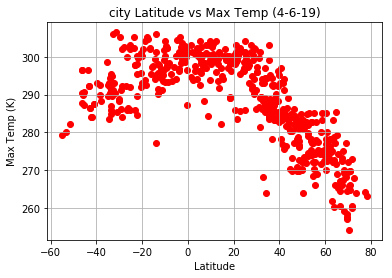

In [7]:
plt.title("city Latitude vs Max Temp (4-6-19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (K)")
plt.grid()

plt.scatter(weather_df["Latitude"],weather_df["Max Temp"], marker="o", color="red")
plt.show()

#### Latitude vs. Humidity Plot

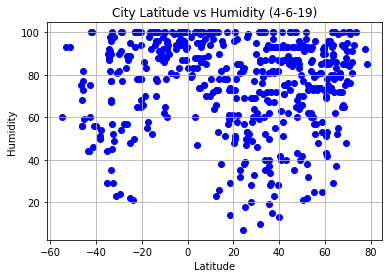

In [8]:
plt.title("City Latitude vs Humidity (4-6-19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

plt.scatter(weather_df["Latitude"],weather_df["Humidity"], marker="o", color="blue")
plt.show()

#### Latitude vs. Cloudiness Plot

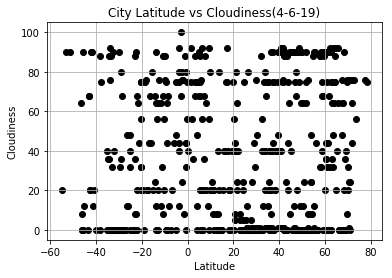

In [9]:
plt.title("City Latitude vs Cloudiness(4-6-19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"], marker="o", color="black")
plt.show()

#### Latitude vs. Wind Speed Plot

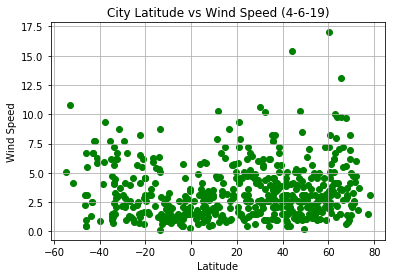

In [10]:
plt.title("City Latitude vs Wind Speed (4-6-19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"], marker="o", color="green")
plt.show()

In [ ]:
#Observations

#1) Tempatures vary, default is using Kelvin.  City Latitude compared to Windspeed hasa few more outlier that have wind speed 9 and greater.
#2) City Latitude and Humidity has 2 outliers relative to the Kelvin values.  All others seem to be clumped between >50 and <100.
#3) City Latitude and Cloudiness, shows that the majority of the population cities are more cloudy above the equator.